In [ ]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys  
import undetected_chromedriver as uc
import re

# Configuración de opciones para Chrome
options = uc.ChromeOptions()
options.add_argument(r"--user-data-dir=C:\Users\adria\AppData\Local\Google\Chrome\User Data")
options.add_argument(r"--profile-directory=Default")  

# Iniciar navegador sin headless para ver si todo funciona bien
driver = uc.Chrome(options=options, version_main=135)

# Lista de palabras clave relacionadas con estafas

keywords_list = [

    # Percepción pública
    "miedo a la IA", "riesgos de la inteligencia artificial", "riesgos IA", "peligros IA", 
    "IA y desempleo", "IA y ética", "ética de la IA", "impacto social de la IA", "IA en la vida diaria", 
    "futuro con IA", "IA y privacidad", "regulación IA", "gobernanza de la IA"]



# Lista para almacenar los tweets
tweets_data = []

# Número de desplazamientos para cargar más tweets
scrolls = 5

# Bucle para hacer una búsqueda para cada palabra clave
for keyword in keywords_list:
    # URL de búsqueda en Twitter (X)
    driver.get(f"https://twitter.com/search?q={keyword}&src=typed_query&f=live")
    time.sleep(5)  # Espera a que cargue la página

    for _ in range(scrolls):
        # Extraer tweets
        tweet_elements = driver.find_elements(By.XPATH, '//article[@data-testid="tweet"]')

        for tweet in tweet_elements:
            try:
                # Usuario
                user = tweet.find_element(By.XPATH, './/span[contains(text(), "@")]').text
                # Contenido del tweet
                content = tweet.find_element(By.XPATH, './/div[@lang]').text
                # Fecha y hora
                date_time = tweet.find_element(By.XPATH, './/time').get_attribute('datetime')
                # Enlaces en el tweet
                links = [link.get_attribute('href') for link in tweet.find_elements(By.XPATH, './/a')]
                # Respuestas y menciones
                mentions = re.findall(r'@\w+', content)
                # Retweets y likes (visibles en la parte inferior del tweet)
                retweets = tweet.find_element(By.XPATH, './/div[@data-testid="retweet"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="retweet"]') else '0'
                likes = tweet.find_element(By.XPATH, './/div[@data-testid="like"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="like"]') else '0'
                
                # Guardar los datos extraídos
                tweets_data.append({
                    "Palabra Clave": keyword,  # Añadimos la palabra clave
                    "Usuario": user,
                    "Contenido": content,
                    "Fecha y Hora": date_time,
                    "Enlaces": links,
                    "Respuestas/Menciones": mentions,
                    "Retweets": retweets,
                    "Likes": likes
                })
            except Exception as e:
                print(f"Error al procesar un tweet: {e}")
                continue

        # Hacer scroll
        driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
        time.sleep(5)

# Guardar los datos en un DataFrame
df = pd.DataFrame(tweets_data)

# Guardar en CSV para análisis posterior
df.to_csv("tweets_Percepción pública.csv", index=False)

# Imprimir el número de tweets recolectados
print(f"Se han recolectado {len(df)} tweets.")

# Cerrar el navegador
driver.quit()

Error al procesar un tweet: Message: no such element: Unable to locate element: {"method":"xpath","selector":".//time"}
  (Session info: chrome=135.0.7049.85); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x004380E3+60707]
	GetHandleVerifier [0x00438124+60772]
	(No symbol) [0x00260683]
	(No symbol) [0x002A8660]
	(No symbol) [0x002A89FB]
	(No symbol) [0x0029DD81]
	(No symbol) [0x002CD094]
	(No symbol) [0x0029DCA4]
	(No symbol) [0x002CD2C4]
	(No symbol) [0x002EE824]
	(No symbol) [0x002CCE46]
	(No symbol) [0x0029C5D3]
	(No symbol) [0x0029D424]
	GetHandleVerifier [0x0067BBC3+2435075]
	GetHandleVerifier [0x00677163+2416035]
	GetHandleVerifier [0x0069350C+2531660]
	GetHandleVerifier [0x0044F1B5+155125]
	GetHandleVerifier [0x00455B5D+182173]
	GetHandleVerifier [0x0043F9B8+91640]
	GetHandleVerifier [0x0043FB60+92064]
	GetHandleVerifier [0x0042A620+4704]
	BaseThrea

In [ ]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys  # Importar Keys
import undetected_chromedriver as uc
import re

# Configuración de opciones para Chrome
options = uc.ChromeOptions()
options.add_argument(r"--user-data-dir=C:\Users\adria\AppData\Local\Google\Chrome\User Data")
options.add_argument(r"--profile-directory=Default")  # Cambia a tu perfil

# Iniciar navegador sin headless para ver si todo funciona bien
driver = uc.Chrome(options=options, version_main=135)

# Lista de palabras clave relacionadas con estafas

keywords_list = [
    # Narrativas apocalípticas
    "IA va a destruir el mundo", "IA fin de la humanidad", "IA apocalipsis", "IA distópica", 
    "IA es peligrosa", "IA matará empleos", "IA va a controlarnos", "IA y control social", 
    "IA Skynet", "IA sin control", "#IApocalipsis", "#MiedoIA",
]



# Lista para almacenar los tweets
tweets_data = []

# Número de desplazamientos para cargar más tweets
scrolls = 5

# Bucle para hacer una búsqueda para cada palabra clave
for keyword in keywords_list:
    # URL de búsqueda en Twitter (X)
    driver.get(f"https://twitter.com/search?q={keyword}&src=typed_query&f=live")
    time.sleep(5)  # Espera a que cargue la página

    for _ in range(scrolls):
        # Extraer tweets
        tweet_elements = driver.find_elements(By.XPATH, '//article[@data-testid="tweet"]')

        for tweet in tweet_elements:
            try:
                # Usuario
                user = tweet.find_element(By.XPATH, './/span[contains(text(), "@")]').text
                # Contenido del tweet
                content = tweet.find_element(By.XPATH, './/div[@lang]').text
                # Fecha y hora
                date_time = tweet.find_element(By.XPATH, './/time').get_attribute('datetime')
                # Enlaces en el tweet
                links = [link.get_attribute('href') for link in tweet.find_elements(By.XPATH, './/a')]
                # Respuestas y menciones
                mentions = re.findall(r'@\w+', content)
                # Retweets y likes (visibles en la parte inferior del tweet)
                retweets = tweet.find_element(By.XPATH, './/div[@data-testid="retweet"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="retweet"]') else '0'
                likes = tweet.find_element(By.XPATH, './/div[@data-testid="like"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="like"]') else '0'
                
                # Guardar los datos extraídos
                tweets_data.append({
                    "Palabra Clave": keyword,  # Añadimos la palabra clave
                    "Usuario": user,
                    "Contenido": content,
                    "Fecha y Hora": date_time,
                    "Enlaces": links,
                    "Respuestas/Menciones": mentions,
                    "Retweets": retweets,
                    "Likes": likes
                })
            except Exception as e:
                print(f"Error al procesar un tweet: {e}")
                continue

        # Hacer scroll
        driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
        time.sleep(5)

# Guardar los datos en un DataFrame
df = pd.DataFrame(tweets_data)

# Guardar en CSV para análisis posterior
df.to_csv("tweets_Narrativas_apocalípticas.csv", index=False)

# Imprimir el número de tweets recolectados
print(f"Se han recolectado {len(df)} tweets.")

# Cerrar el navegador
driver.quit()

Se han recolectado 493 tweets. Los datos están guardados en 'tweets_estafas_computacion_social.csv'.


In [ ]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys  # Importar Keys
import undetected_chromedriver as uc
import re

# Configuración de opciones para Chrome
options = uc.ChromeOptions()
options.add_argument(r"--user-data-dir=C:\Users\adria\AppData\Local\Google\Chrome\User Data")
options.add_argument(r"--profile-directory=Default")  # Cambia a tu perfil

# Iniciar navegador sin headless para ver si todo funciona bien
driver = uc.Chrome(options=options, version_main=135)

# Lista de palabras clave relacionadas con estafas

keywords_list = [
    # Narrativas techno-optimistas
    "IA mejorará el mundo", "IA como herramienta", "IA ayuda humana", "IA y creatividad", 
    "IA para el bien", "IA y progreso", "IA para salvar vidas", "IA optimismo", 
    "IA solución de problemas", "IA transforma el futuro", "#IApositiva", "#IAesperanza",
]



# Lista para almacenar los tweets
tweets_data = []

# Número de desplazamientos para cargar más tweets
scrolls = 5

# Bucle para hacer una búsqueda para cada palabra clave
for keyword in keywords_list:
    # URL de búsqueda en Twitter (X)
    driver.get(f"https://twitter.com/search?q={keyword}&src=typed_query&f=live")
    time.sleep(5)  # Espera a que cargue la página

    for _ in range(scrolls):
        # Extraer tweets
        tweet_elements = driver.find_elements(By.XPATH, '//article[@data-testid="tweet"]')

        for tweet in tweet_elements:
            try:
                # Usuario
                user = tweet.find_element(By.XPATH, './/span[contains(text(), "@")]').text
                # Contenido del tweet
                content = tweet.find_element(By.XPATH, './/div[@lang]').text
                # Fecha y hora
                date_time = tweet.find_element(By.XPATH, './/time').get_attribute('datetime')
                # Enlaces en el tweet
                links = [link.get_attribute('href') for link in tweet.find_elements(By.XPATH, './/a')]
                # Respuestas y menciones
                mentions = re.findall(r'@\w+', content)
                # Retweets y likes (visibles en la parte inferior del tweet)
                retweets = tweet.find_element(By.XPATH, './/div[@data-testid="retweet"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="retweet"]') else '0'
                likes = tweet.find_element(By.XPATH, './/div[@data-testid="like"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="like"]') else '0'
                
                # Guardar los datos extraídos
                tweets_data.append({
                    "Palabra Clave": keyword,  # Añadimos la palabra clave
                    "Usuario": user,
                    "Contenido": content,
                    "Fecha y Hora": date_time,
                    "Enlaces": links,
                    "Respuestas/Menciones": mentions,
                    "Retweets": retweets,
                    "Likes": likes
                })
            except Exception as e:
                print(f"Error al procesar un tweet: {e}")
                continue

        # Hacer scroll
        driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
        time.sleep(5)

# Guardar los datos en un DataFrame
df = pd.DataFrame(tweets_data)

# Guardar en CSV para análisis posterior
df.to_csv("tweets_Narrativas techno-optimistas.csv", index=False)

# Imprimir el número de tweets recolectados
print(f"Se han recolectado {len(df)} tweets.")

# Cerrar el navegador
driver.quit()

Error al procesar un tweet: Message: no such element: Unable to locate element: {"method":"xpath","selector":".//time"}
  (Session info: chrome=135.0.7049.85); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00A380E3+60707]
	GetHandleVerifier [0x00A38124+60772]
	(No symbol) [0x00860683]
	(No symbol) [0x008A8660]
	(No symbol) [0x008A89FB]
	(No symbol) [0x0089DD81]
	(No symbol) [0x008CD094]
	(No symbol) [0x0089DCA4]
	(No symbol) [0x008CD2C4]
	(No symbol) [0x008EE824]
	(No symbol) [0x008CCE46]
	(No symbol) [0x0089C5D3]
	(No symbol) [0x0089D424]
	GetHandleVerifier [0x00C7BBC3+2435075]
	GetHandleVerifier [0x00C77163+2416035]
	GetHandleVerifier [0x00C9350C+2531660]
	GetHandleVerifier [0x00A4F1B5+155125]
	GetHandleVerifier [0x00A55B5D+182173]
	GetHandleVerifier [0x00A3F9B8+91640]
	GetHandleVerifier [0x00A3FB60+92064]
	GetHandleVerifier [0x00A2A620+4704]
	BaseThrea

In [ ]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys  # Importar Keys
import undetected_chromedriver as uc
import re

# Configuración de opciones para Chrome
options = uc.ChromeOptions()
options.add_argument(r"--user-data-dir=C:\Users\adria\AppData\Local\Google\Chrome\User Data")
options.add_argument(r"--profile-directory=Default")  # Cambia a tu perfil

# Iniciar navegador sin headless para ver si todo funciona bien
driver = uc.Chrome(options=options, version_main=135)

# Lista de palabras clave relacionadas con estafas

keywords_list = [

    # Medios y opinión pública
 "medios e inteligencia artificial", 
    "fake news IA", "IA y medios", "IA en la prensa", "cobertura mediática IA",
    "narrativa mediática IA", "cómo se habla de la IA", "debate sobre la IA", 
    "opinión pública IA", "encuesta IA", "percepción social IA", 
    "qué piensa la gente sobre la IA", "IA en redes sociales",

]



# Lista para almacenar los tweets
tweets_data = []

# Número de desplazamientos para cargar más tweets
scrolls = 5

# Bucle para hacer una búsqueda para cada palabra clave
for keyword in keywords_list:
    # URL de búsqueda en Twitter (X)
    driver.get(f"https://twitter.com/search?q={keyword}&src=typed_query&f=live")
    time.sleep(5)  # Espera a que cargue la página

    for _ in range(scrolls):
        # Extraer tweets
        tweet_elements = driver.find_elements(By.XPATH, '//article[@data-testid="tweet"]')

        for tweet in tweet_elements:
            try:
                # Usuario
                user = tweet.find_element(By.XPATH, './/span[contains(text(), "@")]').text
                # Contenido del tweet
                content = tweet.find_element(By.XPATH, './/div[@lang]').text
                # Fecha y hora
                date_time = tweet.find_element(By.XPATH, './/time').get_attribute('datetime')
                # Enlaces en el tweet
                links = [link.get_attribute('href') for link in tweet.find_elements(By.XPATH, './/a')]
                # Respuestas y menciones
                mentions = re.findall(r'@\w+', content)
                # Retweets y likes (visibles en la parte inferior del tweet)
                retweets = tweet.find_element(By.XPATH, './/div[@data-testid="retweet"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="retweet"]') else '0'
                likes = tweet.find_element(By.XPATH, './/div[@data-testid="like"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="like"]') else '0'
                
                # Guardar los datos extraídos
                tweets_data.append({
                    "Palabra Clave": keyword,  # Añadimos la palabra clave
                    "Usuario": user,
                    "Contenido": content,
                    "Fecha y Hora": date_time,
                    "Enlaces": links,
                    "Respuestas/Menciones": mentions,
                    "Retweets": retweets,
                    "Likes": likes
                })
            except Exception as e:
                print(f"Error al procesar un tweet: {e}")
                continue

        # Hacer scroll
        driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
        time.sleep(5)

# Guardar los datos en un DataFrame
df = pd.DataFrame(tweets_data)

# Guardar en CSV para análisis posterior
df.to_csv("tweets_Medios y opinión pública.csv", index=False)

# Imprimir el número de tweets recolectados
print(f"Se han recolectado {len(df)} tweets.")

# Cerrar el navegador
driver.quit()

Se han recolectado 342 tweets. Los datos están guardados en 'tweets_estafas_computacion_social.csv'.


Segundo scrapping

In [3]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys  # Importar Keys
import undetected_chromedriver as uc
import re

# Configuración de opciones para Chrome
options = uc.ChromeOptions()
options.add_argument(r"--user-data-dir=C:\Users\adria\AppData\Local\Google\Chrome\User Data")
options.add_argument(r"--profile-directory=Default")  # Cambia a tu perfil

# Iniciar navegador sin headless para ver si todo funciona bien
driver = uc.Chrome(options=options, version_main=135)

# Lista de palabras clave relacionadas con estafas

keywords_list = [

    # Percepción pública
    "miedo a la IA", "riesgos de la inteligencia artificial", "riesgos IA", "peligros IA", 
    "IA y desempleo", "IA y ética", "ética de la IA", "impacto social de la IA", "IA en la vida diaria", 
    "futuro con IA", "IA y privacidad", "regulación IA", "gobernanza de la IA"]



# Lista para almacenar los tweets
tweets_data = []

# Número de desplazamientos para cargar más tweets
scrolls = 5

# Bucle para hacer una búsqueda para cada palabra clave
for keyword in keywords_list:
    # URL de búsqueda en Twitter (X)
    driver.get(f"https://twitter.com/search?q={keyword}&src=typed_query&f=live")
    time.sleep(5)  # Espera a que cargue la página

    for _ in range(scrolls):
        # Extraer tweets
        tweet_elements = driver.find_elements(By.XPATH, '//article[@data-testid="tweet"]')

        for tweet in tweet_elements:
            try:
                # Usuario
                user = tweet.find_element(By.XPATH, './/span[contains(text(), "@")]').text
                # Contenido del tweet
                content = tweet.find_element(By.XPATH, './/div[@lang]').text
                # Fecha y hora
                date_time = tweet.find_element(By.XPATH, './/time').get_attribute('datetime')
                # Enlaces en el tweet
                links = [link.get_attribute('href') for link in tweet.find_elements(By.XPATH, './/a')]
                # Respuestas y menciones
                mentions = re.findall(r'@\w+', content)
                # Retweets y likes (visibles en la parte inferior del tweet)
                retweets = tweet.find_element(By.XPATH, './/div[@data-testid="retweet"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="retweet"]') else '0'
                likes = tweet.find_element(By.XPATH, './/div[@data-testid="like"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="like"]') else '0'
                
                # Guardar los datos extraídos
                tweets_data.append({
                    "Palabra Clave": keyword,  # Añadimos la palabra clave
                    "Usuario": user,
                    "Contenido": content,
                    "Fecha y Hora": date_time,
                    "Enlaces": links,
                    "Respuestas/Menciones": mentions,
                    "Retweets": retweets,
                    "Likes": likes
                })
            except Exception as e:
                print(f"Error al procesar un tweet: {e}")
                continue

        # Hacer scroll
        driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
        time.sleep(5)

# Guardar los datos en un DataFrame
df = pd.DataFrame(tweets_data)

# Guardar en CSV para análisis posterior
df.to_csv("tweets_Percepción pública2.csv", index=False)

# Imprimir el número de tweets recolectados
print(f"Se han recolectado {len(df)} tweets.")

# Cerrar el navegador
driver.quit()

Se han recolectado 504 tweets.


In [5]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys  # Importar Keys
import undetected_chromedriver as uc
import re

# Configuración de opciones para Chrome
options = uc.ChromeOptions()
options.add_argument(r"--user-data-dir=C:\Users\adria\AppData\Local\Google\Chrome\User Data")
options.add_argument(r"--profile-directory=Default")  # Cambia a tu perfil

# Iniciar navegador sin headless para ver si todo funciona bien
driver = uc.Chrome(options=options, version_main=135)

# Lista de palabras clave relacionadas con estafas

keywords_list = [
    # Narrativas apocalípticas
    "IA va a destruir el mundo", "IA fin de la humanidad", "IA apocalipsis", "IA distópica", 
    "IA es peligrosa", "IA matará empleos", "IA va a controlarnos", "IA y control social", 
    "IA Skynet", "IA sin control", "#IApocalipsis", "#MiedoIA",
]



# Lista para almacenar los tweets
tweets_data = []

# Número de desplazamientos para cargar más tweets
scrolls = 5

# Bucle para hacer una búsqueda para cada palabra clave
for keyword in keywords_list:
    # URL de búsqueda en Twitter (X)
    driver.get(f"https://twitter.com/search?q={keyword}&src=typed_query&f=live")
    time.sleep(5)  # Espera a que cargue la página

    for _ in range(scrolls):
        # Extraer tweets
        tweet_elements = driver.find_elements(By.XPATH, '//article[@data-testid="tweet"]')

        for tweet in tweet_elements:
            try:
                # Usuario
                user = tweet.find_element(By.XPATH, './/span[contains(text(), "@")]').text
                # Contenido del tweet
                content = tweet.find_element(By.XPATH, './/div[@lang]').text
                # Fecha y hora
                date_time = tweet.find_element(By.XPATH, './/time').get_attribute('datetime')
                # Enlaces en el tweet
                links = [link.get_attribute('href') for link in tweet.find_elements(By.XPATH, './/a')]
                # Respuestas y menciones
                mentions = re.findall(r'@\w+', content)
                # Retweets y likes (visibles en la parte inferior del tweet)
                retweets = tweet.find_element(By.XPATH, './/div[@data-testid="retweet"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="retweet"]') else '0'
                likes = tweet.find_element(By.XPATH, './/div[@data-testid="like"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="like"]') else '0'
                
                # Guardar los datos extraídos
                tweets_data.append({
                    "Palabra Clave": keyword,  # Añadimos la palabra clave
                    "Usuario": user,
                    "Contenido": content,
                    "Fecha y Hora": date_time,
                    "Enlaces": links,
                    "Respuestas/Menciones": mentions,
                    "Retweets": retweets,
                    "Likes": likes
                })
            except Exception as e:
                print(f"Error al procesar un tweet: {e}")
                continue

        # Hacer scroll
        driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
        time.sleep(5)

# Guardar los datos en un DataFrame
df = pd.DataFrame(tweets_data)

# Guardar en CSV para análisis posterior
df.to_csv("tweets_Narrativas_apocalípticas2.csv", index=False)

# Imprimir el número de tweets recolectados
print(f"Se han recolectado {len(df)} tweets.")

# Cerrar el navegador
driver.quit()

Se han recolectado 625 tweets.


In [2]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys  # Importar Keys
import undetected_chromedriver as uc
import re

# Configuración de opciones para Chrome
options = uc.ChromeOptions()
options.add_argument(r"--user-data-dir=C:\Users\adria\AppData\Local\Google\Chrome\User Data")
options.add_argument(r"--profile-directory=Default")  # Cambia a tu perfil

# Iniciar navegador sin headless para ver si todo funciona bien
driver = uc.Chrome(options=options, version_main=135)

# Lista de palabras clave relacionadas con estafas

keywords_list = [
    # Narrativas techno-optimistas
    "IA mejorará el mundo", "IA como herramienta", "IA ayuda humana", "IA y creatividad", 
    "IA para el bien", "IA y progreso", "IA para salvar vidas", "IA optimismo", 
    "IA solución de problemas", "IA transforma el futuro", "#IApositiva", "#IAesperanza",
]



# Lista para almacenar los tweets
tweets_data = []

# Número de desplazamientos para cargar más tweets
scrolls = 5

# Bucle para hacer una búsqueda para cada palabra clave
for keyword in keywords_list:
    # URL de búsqueda en Twitter (X)
    driver.get(f"https://twitter.com/search?q={keyword}&src=typed_query&f=live")
    time.sleep(5)  # Espera a que cargue la página

    for _ in range(scrolls):
        # Extraer tweets
        tweet_elements = driver.find_elements(By.XPATH, '//article[@data-testid="tweet"]')

        for tweet in tweet_elements:
            try:
                # Usuario
                user = tweet.find_element(By.XPATH, './/span[contains(text(), "@")]').text
                # Contenido del tweet
                content = tweet.find_element(By.XPATH, './/div[@lang]').text
                # Fecha y hora
                date_time = tweet.find_element(By.XPATH, './/time').get_attribute('datetime')
                # Enlaces en el tweet
                links = [link.get_attribute('href') for link in tweet.find_elements(By.XPATH, './/a')]
                # Respuestas y menciones
                mentions = re.findall(r'@\w+', content)
                # Retweets y likes (visibles en la parte inferior del tweet)
                retweets = tweet.find_element(By.XPATH, './/div[@data-testid="retweet"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="retweet"]') else '0'
                likes = tweet.find_element(By.XPATH, './/div[@data-testid="like"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="like"]') else '0'
                
                # Guardar los datos extraídos
                tweets_data.append({
                    "Palabra Clave": keyword,  # Añadimos la palabra clave
                    "Usuario": user,
                    "Contenido": content,
                    "Fecha y Hora": date_time,
                    "Enlaces": links,
                    "Respuestas/Menciones": mentions,
                    "Retweets": retweets,
                    "Likes": likes
                })
            except Exception as e:
                print(f"Error al procesar un tweet: {e}")
                continue

        # Hacer scroll
        driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
        time.sleep(5)

# Guardar los datos en un DataFrame
df = pd.DataFrame(tweets_data)

# Guardar en CSV para análisis posterior
df.to_csv("tweets_Narrativas techno-optimistas2.csv", index=False)

# Imprimir el número de tweets recolectados
print(f"Se han recolectado {len(df)} tweets.")

# Cerrar el navegador
driver.quit()

Se han recolectado 265 tweets.


In [3]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys  # Importar Keys
import undetected_chromedriver as uc
import re

# Configuración de opciones para Chrome
options = uc.ChromeOptions()
options.add_argument(r"--user-data-dir=C:\Users\adria\AppData\Local\Google\Chrome\User Data")
options.add_argument(r"--profile-directory=Default")  # Cambia a tu perfil

# Iniciar navegador sin headless para ver si todo funciona bien
driver = uc.Chrome(options=options, version_main=135)

# Lista de palabras clave relacionadas con estafas

keywords_list = [

    # Medios y opinión pública
 "medios e inteligencia artificial", 
    "fake news IA", "IA y medios", "IA en la prensa", "cobertura mediática IA",
    "narrativa mediática IA", "cómo se habla de la IA", "debate sobre la IA", 
    "opinión pública IA", "encuesta IA", "percepción social IA", 
    "qué piensa la gente sobre la IA", "IA en redes sociales",

]



# Lista para almacenar los tweets
tweets_data = []

# Número de desplazamientos para cargar más tweets
scrolls = 5

# Bucle para hacer una búsqueda para cada palabra clave
for keyword in keywords_list:
    # URL de búsqueda en Twitter (X)
    driver.get(f"https://twitter.com/search?q={keyword}&src=typed_query&f=live")
    time.sleep(5)  # Espera a que cargue la página

    for _ in range(scrolls):
        # Extraer tweets
        tweet_elements = driver.find_elements(By.XPATH, '//article[@data-testid="tweet"]')

        for tweet in tweet_elements:
            try:
                # Usuario
                user = tweet.find_element(By.XPATH, './/span[contains(text(), "@")]').text
                # Contenido del tweet
                content = tweet.find_element(By.XPATH, './/div[@lang]').text
                # Fecha y hora
                date_time = tweet.find_element(By.XPATH, './/time').get_attribute('datetime')
                # Enlaces en el tweet
                links = [link.get_attribute('href') for link in tweet.find_elements(By.XPATH, './/a')]
                # Respuestas y menciones
                mentions = re.findall(r'@\w+', content)
                # Retweets y likes (visibles en la parte inferior del tweet)
                retweets = tweet.find_element(By.XPATH, './/div[@data-testid="retweet"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="retweet"]') else '0'
                likes = tweet.find_element(By.XPATH, './/div[@data-testid="like"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="like"]') else '0'
                
                # Guardar los datos extraídos
                tweets_data.append({
                    "Palabra Clave": keyword,  # Añadimos la palabra clave
                    "Usuario": user,
                    "Contenido": content,
                    "Fecha y Hora": date_time,
                    "Enlaces": links,
                    "Respuestas/Menciones": mentions,
                    "Retweets": retweets,
                    "Likes": likes
                })
            except Exception as e:
                print(f"Error al procesar un tweet: {e}")
                continue

        # Hacer scroll
        driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
        time.sleep(5)

# Guardar los datos en un DataFrame
df = pd.DataFrame(tweets_data)

# Guardar en CSV para análisis posterior
df.to_csv("tweets_Medios y opinión pública2.csv", index=False)

# Imprimir el número de tweets recolectados
print(f"Se han recolectado {len(df)} tweets.")

# Cerrar el navegador
driver.quit()

Se han recolectado 533 tweets.


In [4]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys  # Importar Keys
import undetected_chromedriver as uc
import re

# Configuración de opciones para Chrome
options = uc.ChromeOptions()
options.add_argument(r"--user-data-dir=C:\Users\adria\AppData\Local\Google\Chrome\User Data")
options.add_argument(r"--profile-directory=Default")  # Cambia a tu perfil

# Iniciar navegador sin headless para ver si todo funciona bien
driver = uc.Chrome(options=options, version_main=135)

# Lista de palabras clave relacionadas con estafas

keywords_list = [

 # Hashtags útiles
 "#ÉticaIA", "#RiesgosIA", 
    "#IAenSociedad", "#IAyFuturo", "#TechnoOptimismo", "#DistopíaDigital", "#IAenMedios"
]



# Lista para almacenar los tweets
tweets_data = []

# Número de desplazamientos para cargar más tweets
scrolls = 5

# Bucle para hacer una búsqueda para cada palabra clave
for keyword in keywords_list:
    # URL de búsqueda en Twitter (X)
    driver.get(f"https://twitter.com/search?q={keyword}&src=typed_query&f=live")
    time.sleep(5)  # Espera a que cargue la página

    for _ in range(scrolls):
        # Extraer tweets
        tweet_elements = driver.find_elements(By.XPATH, '//article[@data-testid="tweet"]')

        for tweet in tweet_elements:
            try:
                # Usuario
                user = tweet.find_element(By.XPATH, './/span[contains(text(), "@")]').text
                # Contenido del tweet
                content = tweet.find_element(By.XPATH, './/div[@lang]').text
                # Fecha y hora
                date_time = tweet.find_element(By.XPATH, './/time').get_attribute('datetime')
                # Enlaces en el tweet
                links = [link.get_attribute('href') for link in tweet.find_elements(By.XPATH, './/a')]
                # Respuestas y menciones
                mentions = re.findall(r'@\w+', content)
                # Retweets y likes (visibles en la parte inferior del tweet)
                retweets = tweet.find_element(By.XPATH, './/div[@data-testid="retweet"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="retweet"]') else '0'
                likes = tweet.find_element(By.XPATH, './/div[@data-testid="like"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="like"]') else '0'
                
                # Guardar los datos extraídos
                tweets_data.append({
                    "Palabra Clave": keyword,  # Añadimos la palabra clave
                    "Usuario": user,
                    "Contenido": content,
                    "Fecha y Hora": date_time,
                    "Enlaces": links,
                    "Respuestas/Menciones": mentions,
                    "Retweets": retweets,
                    "Likes": likes
                })
            except Exception as e:
                print(f"Error al procesar un tweet: {e}")
                continue

        # Hacer scroll
        driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
        time.sleep(5)

# Guardar los datos en un DataFrame
df = pd.DataFrame(tweets_data)

# Guardar en CSV para análisis posterior
df.to_csv("tweets_Hashtags2.csv", index=False)

# Imprimir el número de tweets recolectados
print(f"Se han recolectado {len(df)} tweets.")

# Cerrar el navegador
driver.quit()

Se han recolectado 71 tweets.


In [ ]:
import pandas as pd
import re

# Función para limpiar texto
def limpiar_tweet(text):
    if pd.isnull(text):
        return ""
    text = re.sub(r"http\S+", "", text)            # Quitar URLs
    text = re.sub(r"@\w+", "", text)               # Quitar menciones
    text = re.sub(r"#", "", text)                  # Quitar '#' pero mantener palabra
    text = re.sub(r"[^\w\s]", "", text)            # Quitar signos de puntuación
    text = re.sub(r"\d+", "", text)                # Quitar números
    text = text.lower().strip()                    # Minúsculas y sin espacios extra
    return text

# Función para extraer hashtags (sin #)
def extraer_hashtags(text):
    if pd.isnull(text):
        return []
    return re.findall(r"#(\w+)", text)

# Cargar el CSV original
df = pd.read_csv("tweets_Medios y opinión pública.csv")

# Aplicar funciones
df["text_clean"] = df["Contenido"].apply(limpiar_tweet)
df["hashtags"] = df["Contenido"].apply(extraer_hashtags)

# Guardar nuevo CSV limpio
df.to_csv("tweets_limpios.csv", index=False)

print("✅ Limpieza completada. Archivo guardado como 'tweets_limpios.csv'")

In [14]:
# Aplicar funciones
df["text_clean"] = df["Contenido"].apply(limpiar_tweet)
df["hashtags"] = df["Contenido"].apply(extraer_hashtags)

# Guardar nuevo CSV limpio
df.to_csv("tweets_limpios.csv", index=False)

print("✅ Limpieza completada. Archivo guardado como 'tweets_limpios.csv'")


✅ Limpieza completada. Archivo guardado como 'tweets_limpios.csv'


In [1]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import undetected_chromedriver as uc
import re
from urllib.parse import quote  # Para codificar hashtags en la URL

# Configuración de opciones para Chrome
options = uc.ChromeOptions()
options.add_argument(r"--user-data-dir=C:\Users\adria\AppData\Local\Google\Chrome\User Data")
options.add_argument(r"--profile-directory=Default")  # Cambia a tu perfil

# Iniciar navegador sin headless para ver si todo funciona bien
driver = uc.Chrome(options=options, version_main=135)

# Lista de palabras clave relacionadas con estafas
keywords_list = [
    "#ÉticaIA", "#RiesgosIA", "#IAenSociedad", "#IAyFuturo", 
    "#TechnoOptimismo", "#DistopíaDigital", "#IAenMedios"
]

# Lista para almacenar los tweets
tweets_data = []

# Número de desplazamientos para cargar más tweets
scrolls = 10  # Aumentado para mejorar los resultados

# Bucle para hacer una búsqueda para cada palabra clave
for keyword in keywords_list:
    # Codificar el hashtag para la URL
    search_url = f"https://twitter.com/search?q={quote(keyword)}&src=typed_query&f=live"
    driver.get(search_url)
    time.sleep(10)  # Espera más larga para asegurar que cargue bien

    for _ in range(scrolls):
        # Extraer tweets
        tweet_elements = driver.find_elements(By.XPATH, '//article[@data-testid="tweet"]')

        for tweet in tweet_elements:
            try:
                # Usuario
                user = tweet.find_element(By.XPATH, './/span[contains(text(), "@")]').text
                # Contenido del tweet
                content = tweet.find_element(By.XPATH, './/div[@lang]').text
                # Fecha y hora
                date_time = tweet.find_element(By.XPATH, './/time').get_attribute('datetime')
                # Enlaces en el tweet
                links = [link.get_attribute('href') for link in tweet.find_elements(By.XPATH, './/a')]
                # Respuestas y menciones
                mentions = re.findall(r'@\w+', content)
                # Retweets y likes
                retweets = tweet.find_element(By.XPATH, './/div[@data-testid="retweet"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="retweet"]') else '0'
                likes = tweet.find_element(By.XPATH, './/div[@data-testid="like"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="like"]') else '0'
                
                # Filtro: comprobar si el hashtag está en el contenido del tweet
                if keyword.lower() in content.lower():
                    tweets_data.append({
                        "Palabra Clave": keyword,
                        "Usuario": user,
                        "Contenido": content,
                        "Fecha y Hora": date_time,
                        "Enlaces": links,
                        "Respuestas/Menciones": mentions,
                        "Retweets": retweets,
                        "Likes": likes
                    })
            except Exception as e:
                print(f"Error al procesar un tweet: {e}")
                continue

        # Hacer scroll
        driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
        time.sleep(5)

# Guardar los datos en un DataFrame
df = pd.DataFrame(tweets_data)

# Guardar en CSV para análisis posterior
df.to_csv("tweets_Hashtags.csv", index=False)

# Imprimir el número de tweets recolectados
print(f"Se han recolectado {len(df)} tweets.")

# Cerrar el navegador
driver.quit()


Se han recolectado 329 tweets.


In [ ]:
import pandas as pd
import ast
import networkx as nx

# Cargar CSV limpio
df = pd.read_csv("tweets_limpios.csv")

# Asegurar que la columna 'Respuestas/Menciones' se lea como lista (está en formato string)
df["Respuestas/Menciones"] = df["Respuestas/Menciones"].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x != "[]" else [])

# Crear lista de aristas (Usuario menciona a otro usuario)
edges = []
for _, row in df.iterrows():
    origen = row["Usuario"]
    for destino in row["Respuestas/Menciones"]:
        edges.append((origen, destino))

# Crear grafo dirigido
G = nx.DiGraph()
G.add_edges_from(edges)

# Calcular centralidades para análisis posterior
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
in_degree = dict(G.in_degree())
out_degree = dict(G.out_degree())

# Crear DataFrame de nodos con atributos
nodos_df = pd.DataFrame({
    "Id": list(G.nodes()),
    "Label": list(G.nodes()),
    "DegreeCentrality": [degree_centrality[n] for n in G.nodes()],
    "BetweennessCentrality": [betweenness_centrality[n] for n in G.nodes()],
    "InDegree": [in_degree[n] for n in G.nodes()],
    "OutDegree": [out_degree[n] for n in G.nodes()],
})

# Crear DataFrame de aristas
aristas_df = pd.DataFrame(edges, columns=["Source", "Target"])
aristas_df["Weight"] = 1  # Puedes agregar lógica para contar múltiples menciones

# Exportar archivos para Gephi
nodos_path = "nodos_usuarios.csv"
aristas_path = "aristas_usuarios.csv"
nodos_df.to_csv(nodos_path, index=False)
aristas_df.to_csv(aristas_path, index=False)

nodos_path, aristas_path


('nodos_usuarios.csv', 'aristas_usuarios.csv')

In [ ]:
import pandas as pd
import os
import re
import itertools
import networkx as nx

# Lista completa de palabras clave (normalizadas a minúsculas)
keywords = keywords = [
    # Generales
    "inteligencia artificial", "IA", "AI", "artificial intelligence", "IA generativa", "chatgpt", "openai", 
    "midjourney", "dall-e", "bard", "gemini AI",

    # Percepción pública
    "miedo a la IA", "riesgos de la inteligencia artificial", "riesgos IA", "peligros IA", 
    "IA y desempleo", "IA y trabajo", "IA y ética", "ética de la IA", "impacto social de la IA",
    "IA y educación", "IA en la vida diaria", "IA en la sociedad", "IA y humanos", 
    "futuro con IA", "IA y privacidad", "regulación IA", "gobernanza de la IA",

    # Narrativas apocalípticas
    "IA va a destruir el mundo", "IA fin de la humanidad", "IA apocalipsis", "IA distópica", 
    "IA es peligrosa", "IA matará empleos", "IA va a controlarnos", "IA y control social", 
    "IA Skynet", "IA sin control", "#IApocalipsis", "#MiedoIA",

    # Narrativas techno-optimistas
    "IA mejorará el mundo", "IA como herramienta", "IA ayuda humana", "IA y creatividad", 
    "IA para el bien", "IA y progreso", "IA para salvar vidas", "IA optimismo", 
    "IA solución de problemas", "IA transforma el futuro", "#IApositiva", "#IAesperanza",

    # Medios y opinión pública
    "IA en las noticias", "discursos sobre IA", "medios e inteligencia artificial", 
    "fake news IA", "IA y medios", "IA en la prensa", "cobertura mediática IA",
    "narrativa mediática IA", "cómo se habla de la IA", "debate sobre la IA", 
    "opinión pública IA", "encuesta IA", "percepción social IA", 
    "qué piensa la gente sobre la IA", "IA en redes sociales",

    # Hashtags útiles
    "#InteligenciaArtificial", "#AI", "#IA", "#AIGenerative", "#ÉticaIA", "#RiesgosIA", 
    "#IAenSociedad", "#IAyFuturo", "#TechnoOptimismo", "#DistopíaDigital", "#IAenMedios"
]


# Función para detectar temas presentes en un texto
def detectar_keywords(text, keyword_list):
    if pd.isnull(text):
        return []
    text = text.lower()
    encontrados = [kw for kw in keyword_list if kw in text]
    return list(set(encontrados))

# Buscar todos los archivos CSV subidos anteriormente (tweets por tema)
csv_dir = "C:\\Users\\adria\\OneDrive\\Escritorio\\CSP\\csvs"
archivos_csv = [f for f in os.listdir(csv_dir) if f.endswith(".csv") and "tweets" in f]

# Leer y unir todos los CSVs
df_todos = pd.concat([pd.read_csv(os.path.join(csv_dir, archivo)) for archivo in archivos_csv])

# Detectar temas en cada tweet limpio
df_todos["temas"] = df_todos["Contenido"].apply(lambda x: detectar_keywords(x, keywords))

# Crear aristas por coocurrencia de temas en el mismo tweet
coocurrencias = []
for temas in df_todos["temas"]:
    if len(temas) > 1:
        coocurrencias.extend(itertools.combinations(sorted(set(temas)), 2))

# Crear grafo no dirigido
G_temas = nx.Graph()
G_temas.add_edges_from(coocurrencias)

# Asignar pesos (frecuencia de coocurrencia)
for (u, v) in G_temas.edges():
    G_temas[u][v]["weight"] = coocurrencias.count((u, v))

# Crear DataFrame de nodos y aristas para Gephi
nodos_temas = pd.DataFrame({
    "Id": list(G_temas.nodes()),
    "Label": list(G_temas.nodes()),
    "Grado": [G_temas.degree(n) for n in G_temas.nodes()]
})

aristas_temas = pd.DataFrame([
    {"Source": u, "Target": v, "Weight": G_temas[u][v]["weight"]}
    for u, v in G_temas.edges()
])

# Guardar archivos para Gephi
nodos_path = "nodos_temas"
aristas_path = "aristas_temas"
nodos_temas.to_csv(nodos_path, index=False)
aristas_temas.to_csv(aristas_path, index=False)

nodos_path, aristas_path


('nodos_temas', 'aristas_temas')

In [11]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import undetected_chromedriver as uc
import re
from urllib.parse import quote  # Para codificar hashtags en la URL

# Configuración de opciones para Chrome
options = uc.ChromeOptions()
options.add_argument(r"--user-data-dir=C:\Users\adria\AppData\Local\Google\Chrome\User Data")
options.add_argument(r"--profile-directory=Default")  # Cambia a tu perfil

# Iniciar navegador sin headless para ver si todo funciona bien
driver = uc.Chrome(options=options, version_main=135)

# Lista de palabras clave relacionadas con estafas
keywords_list = [
    "#AI", "#ChatGPT", "#OpenAI", "#ArtificialIntelligence", "#AGI", "GPT-5",
    "#AIwillDestroyUs", "#AIapocalypse", "AI is dangerous", "AI will end humanity",
    "#AIforGood", "AI will save us", "#AIrevolution"
]


# Lista para almacenar los tweets
tweets_data = []

# Número de desplazamientos para cargar más tweets
scrolls = 10  # Aumentado para mejorar los resultados

# Bucle para hacer una búsqueda para cada palabra clave
for keyword in keywords_list:
    # Codificar el hashtag para la URL
    search_url = f"https://twitter.com/search?q={quote(keyword)}&src=typed_query&f=live"
    driver.get(search_url)
    time.sleep(10)  # Espera más larga para asegurar que cargue bien

    for _ in range(scrolls):
        # Extraer tweets
        tweet_elements = driver.find_elements(By.XPATH, '//article[@data-testid="tweet"]')

        for tweet in tweet_elements:
            try:
                # Usuario
                user = tweet.find_element(By.XPATH, './/span[contains(text(), "@")]').text
                # Contenido del tweet
                content = tweet.find_element(By.XPATH, './/div[@lang]').text
                # Fecha y hora
                date_time = tweet.find_element(By.XPATH, './/time').get_attribute('datetime')
                # Enlaces en el tweet
                links = [link.get_attribute('href') for link in tweet.find_elements(By.XPATH, './/a')]
                # Respuestas y menciones
                mentions = re.findall(r'@\w+', content)
                # Retweets y likes
                retweets = tweet.find_element(By.XPATH, './/div[@data-testid="retweet"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="retweet"]') else '0'
                likes = tweet.find_element(By.XPATH, './/div[@data-testid="like"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="like"]') else '0'
                
                # Filtro: comprobar si el hashtag está en el contenido del tweet
                if keyword.lower() in content.lower():
                    tweets_data.append({
                        "Palabra Clave": keyword,
                        "Usuario": user,
                        "Contenido": content,
                        "Fecha y Hora": date_time,
                        "Enlaces": links,
                        "Respuestas/Menciones": mentions,
                        "Retweets": retweets,
                        "Likes": likes
                    })
            except Exception as e:
                print(f"Error al procesar un tweet: {e}")
                continue

        # Hacer scroll
        driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
        time.sleep(5)

# Guardar los datos en un DataFrame
df = pd.DataFrame(tweets_data)

# Guardar en CSV para análisis posterior
df.to_csv("tweets_Hashtags.csv", index=False)

# Imprimir el número de tweets recolectados
print(f"Se han recolectado {len(df)} tweets.")

# Cerrar el navegador
driver.quit()


Error al procesar un tweet: Message: no such element: Unable to locate element: {"method":"xpath","selector":".//div[@lang]"}
  (Session info: chrome=135.0.7049.96); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x005A8073+60707]
	GetHandleVerifier [0x005A80B4+60772]
	(No symbol) [0x003D0683]
	(No symbol) [0x00418660]
	(No symbol) [0x004189FB]
	(No symbol) [0x0040DD81]
	(No symbol) [0x0043D094]
	(No symbol) [0x0040DCA4]
	(No symbol) [0x0043D2C4]
	(No symbol) [0x0045E824]
	(No symbol) [0x0043CE46]
	(No symbol) [0x0040C5D3]
	(No symbol) [0x0040D424]
	GetHandleVerifier [0x007EBB53+2435075]
	GetHandleVerifier [0x007E70F3+2416035]
	GetHandleVerifier [0x0080349C+2531660]
	GetHandleVerifier [0x005BF145+155125]
	GetHandleVerifier [0x005C5AED+182173]
	GetHandleVerifier [0x005AF948+91640]
	GetHandleVerifier [0x005AFAF0+92064]
	GetHandleVerifier [0x0059A5B0+4704]
	Bas

In [2]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import undetected_chromedriver as uc
import re
from urllib.parse import quote

# Configuración de opciones para Chrome
options = uc.ChromeOptions()
options.add_argument(r"--user-data-dir=C:\Users\adria\AppData\Local\Google\Chrome\User Data")
options.add_argument(r"--profile-directory=Default")

# Iniciar navegador
driver = uc.Chrome(options=options, version_main=135)

# Lista extendida de palabras clave techno-optimistas y apocalípticas (alta co-ocurrencia)
keywords_list = [

    "#AIwillDestroyUs", "#AIapocalypse", "AI dangers", "AI will end humanity",
    "#AIforGood", "#AIrevolution"
]

tweets_data = []
scrolls = 10

for keyword in keywords_list:
    print(f"🔍 Buscando tweets para: {keyword}")
    search_url = f"https://twitter.com/search?q={quote(keyword)}&src=typed_query&f=live"
    driver.get(search_url)
    time.sleep(10)

    for _ in range(scrolls):
        tweet_elements = driver.find_elements(By.XPATH, '//article[@data-testid="tweet"]')

        for tweet in tweet_elements:
            try:
                # Extraer contenido del tweet con idioma
                content_div = tweet.find_element(By.XPATH, './/div[@lang]')
                lang = content_div.get_attribute('lang')
                
                # Solo conservar tweets en español o inglés
                if lang not in ['es', 'en']:
                    continue

                user = tweet.find_element(By.XPATH, './/span[contains(text(), "@")]').text
                content = content_div.text
                date_time = tweet.find_element(By.XPATH, './/time').get_attribute('datetime')
                links = [link.get_attribute('href') for link in tweet.find_elements(By.XPATH, './/a')]
                mentions = re.findall(r'@\w+', content)
                retweets = tweet.find_element(By.XPATH, './/div[@data-testid="retweet"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="retweet"]') else '0'
                likes = tweet.find_element(By.XPATH, './/div[@data-testid="like"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="like"]') else '0'

                if keyword.lower() in content.lower():
                    tweets_data.append({
                        "Palabra Clave": keyword,
                        "Usuario": user,
                        "Contenido": content,
                        "Idioma": lang,
                        "Fecha y Hora": date_time,
                        "Enlaces": links,
                        "Respuestas/Menciones": mentions,
                        "Retweets": retweets,
                        "Likes": likes
                    })

            except Exception as e:
                print(f"⚠️ Error al procesar un tweet: {e}")
                continue

        driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
        time.sleep(5)

# Guardar los datos en un DataFrame
df = pd.DataFrame(tweets_data)
df.to_csv("tweets_IA_technoNarrativas_filtrados1.csv", index=False)

print(f"\n✅ Se han recolectado {len(df)} tweets en español o inglés.")
driver.quit()


🔍 Buscando tweets para: #AIwillDestroyUs
🔍 Buscando tweets para: #AIapocalypse
🔍 Buscando tweets para: AI dangers
⚠️ Error al procesar un tweet: Message: stale element reference: stale element not found in the current frame
  (Session info: chrome=135.0.7049.96); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#stale-element-reference-exception
Stacktrace:
	GetHandleVerifier [0x00E18073+60707]
	GetHandleVerifier [0x00E180B4+60772]
	(No symbol) [0x00C40683]
	(No symbol) [0x00C46DE7]
	(No symbol) [0x00C490DA]
	(No symbol) [0x00C49157]
	(No symbol) [0x00C87EF4]
	(No symbol) [0x00C889FB]
	(No symbol) [0x00C7DD81]
	(No symbol) [0x00CAD094]
	(No symbol) [0x00C7DCA4]
	(No symbol) [0x00CAD2C4]
	(No symbol) [0x00CCE824]
	(No symbol) [0x00CACE46]
	(No symbol) [0x00C7C5D3]
	(No symbol) [0x00C7D424]
	GetHandleVerifier [0x0105BB53+2435075]
	GetHandleVerifier [0x010570F3+2416035]
	GetHandleVerifier [0x0107349C+2531660]
	GetHandleV

In [3]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import undetected_chromedriver as uc
import re
from urllib.parse import quote

# Configuración de opciones para Chrome
options = uc.ChromeOptions()
options.add_argument(r"--user-data-dir=C:\Users\adria\AppData\Local\Google\Chrome\User Data")
options.add_argument(r"--profile-directory=Default")

# Iniciar navegador
driver = uc.Chrome(options=options, version_main=135)

# Lista extendida de palabras clave techno-optimistas y apocalípticas (alta co-ocurrencia)
keywords_list = [

 "#FutureOfAI", "The AI revolution", "The rise of AI",
    "AI takeover", "#HumansVsAI", "AI replacing jobs", "AI is the future", 
]

tweets_data = []
scrolls = 10

for keyword in keywords_list:
    print(f"🔍 Buscando tweets para: {keyword}")
    search_url = f"https://twitter.com/search?q={quote(keyword)}&src=typed_query&f=live"
    driver.get(search_url)
    time.sleep(10)

    for _ in range(scrolls):
        tweet_elements = driver.find_elements(By.XPATH, '//article[@data-testid="tweet"]')

        for tweet in tweet_elements:
            try:
                # Extraer contenido del tweet con idioma
                content_div = tweet.find_element(By.XPATH, './/div[@lang]')
                lang = content_div.get_attribute('lang')
                
                # Solo conservar tweets en español o inglés
                if lang not in ['es', 'en']:
                    continue

                user = tweet.find_element(By.XPATH, './/span[contains(text(), "@")]').text
                content = content_div.text
                date_time = tweet.find_element(By.XPATH, './/time').get_attribute('datetime')
                links = [link.get_attribute('href') for link in tweet.find_elements(By.XPATH, './/a')]
                mentions = re.findall(r'@\w+', content)
                retweets = tweet.find_element(By.XPATH, './/div[@data-testid="retweet"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="retweet"]') else '0'
                likes = tweet.find_element(By.XPATH, './/div[@data-testid="like"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="like"]') else '0'

                if keyword.lower() in content.lower():
                    tweets_data.append({
                        "Palabra Clave": keyword,
                        "Usuario": user,
                        "Contenido": content,
                        "Idioma": lang,
                        "Fecha y Hora": date_time,
                        "Enlaces": links,
                        "Respuestas/Menciones": mentions,
                        "Retweets": retweets,
                        "Likes": likes
                    })

            except Exception as e:
                print(f"⚠️ Error al procesar un tweet: {e}")
                continue

        driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
        time.sleep(5)

# Guardar los datos en un DataFrame
df = pd.DataFrame(tweets_data)
df.to_csv("tweets_IA_technoNarrativas_filtrados2.csv", index=False)

print(f"\n✅ Se han recolectado {len(df)} tweets en español o inglés.")
driver.quit()


🔍 Buscando tweets para: #FutureOfAI
🔍 Buscando tweets para: The AI revolution
⚠️ Error al procesar un tweet: Message: stale element reference: stale element not found in the current frame
  (Session info: chrome=135.0.7049.96); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#stale-element-reference-exception
Stacktrace:
	GetHandleVerifier [0x006B8073+60707]
	GetHandleVerifier [0x006B80B4+60772]
	(No symbol) [0x004E0683]
	(No symbol) [0x004E6DE7]
	(No symbol) [0x004E90DA]
	(No symbol) [0x004E9157]
	(No symbol) [0x00527EF4]
	(No symbol) [0x005289FB]
	(No symbol) [0x0051E131]
	(No symbol) [0x0054D094]
	(No symbol) [0x0051DCA4]
	(No symbol) [0x0054D2C4]
	(No symbol) [0x0056E824]
	(No symbol) [0x0054CE46]
	(No symbol) [0x0051C5D3]
	(No symbol) [0x0051D424]
	GetHandleVerifier [0x008FBB53+2435075]
	GetHandleVerifier [0x008F70F3+2416035]
	GetHandleVerifier [0x0091349C+2531660]
	GetHandleVerifier [0x006CF145+155125]
	GetHand

In [ ]:
#Nuevos keywords

In [27]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import undetected_chromedriver as uc
import re
from urllib.parse import quote

# Configuración de opciones para Chrome
options = uc.ChromeOptions()
options.add_argument(r"--user-data-dir=C:\Users\adria\AppData\Local\Google\Chrome\User Data")
options.add_argument(r"--profile-directory=Default")

# Iniciar navegador
driver = uc.Chrome(options=options, version_main=135)

# Lista extendida de palabras clave techno-optimistas y apocalípticas (alta co-ocurrencia)
keywords_list = [
    "la IA nos destruirá",
    "IA incontrolable",
    "IA se volverá consciente",
    "dominio de las máquinas",
    "IA sin ética",
    "pérdida de control sobre la IA",
    "Skynet está cerca",
    "IA reemplazará humanos",
    "eliminación de trabajos por IA",
    "IA va a quitarnos el trabajo",
    "fin del empleo con IA",
    "IA hará obsoletos a los humanos",
    "deepfakes IA",
    "noticias falsas con IA",
    "IA generativa crea mentiras",
    "peligros de los deepfakes",
    "IA generativa desinformación",
    "ansiedad por la IA",
    "colapso social por la IA"
]


tweets_data = []
scrolls = 10

for keyword in keywords_list:
    print(f"🔍 Buscando tweets para: {keyword}")
    search_url = f"https://twitter.com/search?q={quote(keyword)}&src=typed_query&f=live"
    driver.get(search_url)
    time.sleep(10)

    for _ in range(scrolls):
        tweet_elements = driver.find_elements(By.XPATH, '//article[@data-testid="tweet"]')

        for tweet in tweet_elements:
            try:
                # Extraer contenido del tweet con idioma
                content_div = tweet.find_element(By.XPATH, './/div[@lang]')
                lang = content_div.get_attribute('lang')
                
                # Solo conservar tweets en español o inglés
                if lang not in ['es', 'en']:
                    continue

                user = tweet.find_element(By.XPATH, './/span[contains(text(), "@")]').text
                content = content_div.text
                date_time = tweet.find_element(By.XPATH, './/time').get_attribute('datetime')
                links = [link.get_attribute('href') for link in tweet.find_elements(By.XPATH, './/a')]
                mentions = re.findall(r'@\w+', content)
                retweets = tweet.find_element(By.XPATH, './/div[@data-testid="retweet"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="retweet"]') else '0'
                likes = tweet.find_element(By.XPATH, './/div[@data-testid="like"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="like"]') else '0'

                if keyword.lower() in content.lower():
                    tweets_data.append({
                        "Palabra Clave": keyword,
                        "Usuario": user,
                        "Contenido": content,
                        "Idioma": lang,
                        "Fecha y Hora": date_time,
                        "Enlaces": links,
                        "Respuestas/Menciones": mentions,
                        "Retweets": retweets,
                        "Likes": likes
                    })

            except Exception as e:
                print(f"⚠️ Error al procesar un tweet: {e}")
                continue

        driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
        time.sleep(5)

# Guardar los datos en un DataFrame
df = pd.DataFrame(tweets_data)
df.to_csv("tweets_apocalipticos.csv", index=False)

print(f"\n✅ Se han recolectado {len(df)} tweets en español o inglés.")
driver.quit()

🔍 Buscando tweets para: la IA nos destruirá
🔍 Buscando tweets para: IA incontrolable
🔍 Buscando tweets para: IA se volverá consciente
🔍 Buscando tweets para: dominio de las máquinas
🔍 Buscando tweets para: IA sin ética
🔍 Buscando tweets para: pérdida de control sobre la IA
🔍 Buscando tweets para: Skynet está cerca
🔍 Buscando tweets para: IA reemplazará humanos
🔍 Buscando tweets para: eliminación de trabajos por IA
🔍 Buscando tweets para: IA va a quitarnos el trabajo
🔍 Buscando tweets para: fin del empleo con IA
🔍 Buscando tweets para: IA hará obsoletos a los humanos
🔍 Buscando tweets para: deepfakes IA
🔍 Buscando tweets para: noticias falsas con IA
🔍 Buscando tweets para: IA generativa crea mentiras
🔍 Buscando tweets para: peligros de los deepfakes
🔍 Buscando tweets para: IA generativa desinformación
🔍 Buscando tweets para: ansiedad por la IA
🔍 Buscando tweets para: colapso social por la IA

✅ Se han recolectado 90 tweets en español o inglés.


In [2]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys  # Importar Keys
import undetected_chromedriver as uc
import re

# Configuración de opciones para Chrome
options = uc.ChromeOptions()
options.add_argument(r"--user-data-dir=C:\Users\adria\AppData\Local\Google\Chrome\User Data")
options.add_argument(r"--profile-directory=Default")  # Cambia a tu perfil

# Iniciar navegador sin headless para ver si todo funciona bien
driver = uc.Chrome(options=options, version_main=135)

# Lista de palabras clave relacionadas con estafas

keywords_list =  [
    "la IA nos destruirá",
    "IA incontrolable",
    "IA se volverá consciente",
    "dominio de las máquinas",
    "IA sin ética",
    "pérdida de control sobre la IA",
    "Skynet está cerca",
    "IA reemplazará humanos",
    "eliminación de trabajos por IA",
    "IA va a quitarnos el trabajo",
    "fin del empleo con IA",
    "IA hará obsoletos a los humanos",
    "deepfakes IA",
    "noticias falsas con IA",
    "IA generativa crea mentiras",
    "peligros de los deepfakes",
    "IA generativa desinformación",
    "ansiedad por la IA",
    "colapso social por la IA"
]


# Lista para almacenar los tweets
tweets_data = []

# Número de desplazamientos para cargar más tweets
scrolls = 5

# Bucle para hacer una búsqueda para cada palabra clave
for keyword in keywords_list:
    # URL de búsqueda en Twitter (X)
    driver.get(f"https://twitter.com/search?q={keyword}&src=typed_query&f=live")
    time.sleep(5)  # Espera a que cargue la página

    for _ in range(scrolls):
        # Extraer tweets
        tweet_elements = driver.find_elements(By.XPATH, '//article[@data-testid="tweet"]')

        for tweet in tweet_elements:
            try:
                # Usuario
                user = tweet.find_element(By.XPATH, './/span[contains(text(), "@")]').text
                # Contenido del tweet
                content = tweet.find_element(By.XPATH, './/div[@lang]').text
                # Fecha y hora
                date_time = tweet.find_element(By.XPATH, './/time').get_attribute('datetime')
                # Enlaces en el tweet
                links = [link.get_attribute('href') for link in tweet.find_elements(By.XPATH, './/a')]
                # Respuestas y menciones
                mentions = re.findall(r'@\w+', content)
                # Retweets y likes (visibles en la parte inferior del tweet)
                retweets = tweet.find_element(By.XPATH, './/div[@data-testid="retweet"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="retweet"]') else '0'
                likes = tweet.find_element(By.XPATH, './/div[@data-testid="like"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="like"]') else '0'
                
                # Guardar los datos extraídos
                tweets_data.append({
                    "Palabra Clave": keyword,  # Añadimos la palabra clave
                    "Usuario": user,
                    "Contenido": content,
                    "Fecha y Hora": date_time,
                    "Enlaces": links,
                    "Respuestas/Menciones": mentions,
                    "Retweets": retweets,
                    "Likes": likes
                })
            except Exception as e:
                print(f"Error al procesar un tweet: {e}")
                continue

        # Hacer scroll
        driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
        time.sleep(5)

# Guardar los datos en un DataFrame
df = pd.DataFrame(tweets_data)

# Guardar en CSV para análisis posterior
df.to_csv("tweets_apocalipticos2.csv", index=False)

# Imprimir el número de tweets recolectados
print(f"Se han recolectado {len(df)} tweets.")

# Cerrar el navegador
driver.quit()

Se han recolectado 392 tweets.


In [ ]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import undetected_chromedriver as uc
import re
from urllib.parse import quote

# Configuración de opciones para Chrome
options = uc.ChromeOptions()
options.add_argument(r"--user-data-dir=C:\Users\adria\AppData\Local\Google\Chrome\User Data")
options.add_argument(r"--profile-directory=Default")

# Iniciar navegador
driver = uc.Chrome(options=options, version_main=135)

# Lista extendida de palabras clave techno-optimistas y apocalípticas (alta co-ocurrencia)
keywords_list = [
    "#IADistópica",
    "#NoAlaIA",
    "#ControlIA",
    "#IApeligro",
    "#Skynet2025",
    "#IADestructiva",
    "#PánicoIA"
]


tweets_data = []
scrolls = 10

for keyword in keywords_list:
    print(f"🔍 Buscando tweets para: {keyword}")
    search_url = f"https://twitter.com/search?q={quote(keyword)}&src=typed_query&f=live"
    driver.get(search_url)
    time.sleep(10)

    for _ in range(scrolls):
        tweet_elements = driver.find_elements(By.XPATH, '//article[@data-testid="tweet"]')

        for tweet in tweet_elements:
            try:
                # Extraer contenido del tweet con idioma
                content_div = tweet.find_element(By.XPATH, './/div[@lang]')
                lang = content_div.get_attribute('lang')
                
                # Solo conservar tweets en español o inglés
                if lang not in ['es', 'en']:
                    continue

                user = tweet.find_element(By.XPATH, './/span[contains(text(), "@")]').text
                content = content_div.text
                date_time = tweet.find_element(By.XPATH, './/time').get_attribute('datetime')
                links = [link.get_attribute('href') for link in tweet.find_elements(By.XPATH, './/a')]
                mentions = re.findall(r'@\w+', content)
                retweets = tweet.find_element(By.XPATH, './/div[@data-testid="retweet"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="retweet"]') else '0'
                likes = tweet.find_element(By.XPATH, './/div[@data-testid="like"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="like"]') else '0'

                if keyword.lower() in content.lower():
                    tweets_data.append({
                        "Palabra Clave": keyword,
                        "Usuario": user,
                        "Contenido": content,
                        "Idioma": lang,
                        "Fecha y Hora": date_time,
                        "Enlaces": links,
                        "Respuestas/Menciones": mentions,
                        "Retweets": retweets,
                        "Likes": likes
                    })

            except Exception as e:
                print(f"⚠️ Error al procesar un tweet: {e}")
                continue

        driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
        time.sleep(5)

# Guardar los datos en un DataFrame
df = pd.DataFrame(tweets_data)
df.to_csv("tweets_hashtags_apo_new.csv", index=False)

print(f"\n✅ Se han recolectado {len(df)} tweets en español o inglés.")
driver.quit()


🔍 Buscando tweets para: #IADistópica
🔍 Buscando tweets para: #NoAlaIA
🔍 Buscando tweets para: #ControlIA
🔍 Buscando tweets para: #IApeligro
🔍 Buscando tweets para: #Skynet2025
🔍 Buscando tweets para: #IADestructiva
🔍 Buscando tweets para: #PánicoIA

✅ Se han recolectado 140 tweets en español o inglés.


In [29]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import undetected_chromedriver as uc
import re
from urllib.parse import quote

# Configuración de opciones para Chrome
options = uc.ChromeOptions()
options.add_argument(r"--user-data-dir=C:\Users\adria\AppData\Local\Google\Chrome\User Data")
options.add_argument(r"--profile-directory=Default")

# Iniciar navegador
driver = uc.Chrome(options=options, version_main=135)

# Lista extendida de palabras clave techno-optimistas y apocalípticas (alta co-ocurrencia)
keywords_list = [
    "IA que mejora el mundo",
    "IA para curar enfermedades",
    "IA salva vidas",
    "IA como aliada",
    "potencial positivo de la IA",
    "IA humanista",
    "IA como nueva revolución",
    "arte con IA",
    "IA como musa",
    "nuevas formas de arte con IA",
    "diseño creativo con IA",
    "IA nos hará mejores",
    "IA que empodera a las personas",
    "IA para resolver problemas globales",
    "fe en la tecnología",
    "futuro brillante con IA",
    "tecnología para el bien común"
]



tweets_data = []
scrolls = 10

for keyword in keywords_list:
    print(f"🔍 Buscando tweets para: {keyword}")
    search_url = f"https://twitter.com/search?q={quote(keyword)}&src=typed_query&f=live"
    driver.get(search_url)
    time.sleep(10)

    for _ in range(scrolls):
        tweet_elements = driver.find_elements(By.XPATH, '//article[@data-testid="tweet"]')

        for tweet in tweet_elements:
            try:
                # Extraer contenido del tweet con idioma
                content_div = tweet.find_element(By.XPATH, './/div[@lang]')
                lang = content_div.get_attribute('lang')
                
                # Solo conservar tweets en español o inglés
                if lang not in ['es', 'en']:
                    continue

                user = tweet.find_element(By.XPATH, './/span[contains(text(), "@")]').text
                content = content_div.text
                date_time = tweet.find_element(By.XPATH, './/time').get_attribute('datetime')
                links = [link.get_attribute('href') for link in tweet.find_elements(By.XPATH, './/a')]
                mentions = re.findall(r'@\w+', content)
                retweets = tweet.find_element(By.XPATH, './/div[@data-testid="retweet"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="retweet"]') else '0'
                likes = tweet.find_element(By.XPATH, './/div[@data-testid="like"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="like"]') else '0'

                if keyword.lower() in content.lower():
                    tweets_data.append({
                        "Palabra Clave": keyword,
                        "Usuario": user,
                        "Contenido": content,
                        "Idioma": lang,
                        "Fecha y Hora": date_time,
                        "Enlaces": links,
                        "Respuestas/Menciones": mentions,
                        "Retweets": retweets,
                        "Likes": likes
                    })

            except Exception as e:
                print(f"⚠️ Error al procesar un tweet: {e}")
                continue

        driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
        time.sleep(5)

# Guardar los datos en un DataFrame
df = pd.DataFrame(tweets_data)
df.to_csv("tweets_opti.csv", index=False)

print(f"\n✅ Se han recolectado {len(df)} tweets en español o inglés.")
driver.quit()


🔍 Buscando tweets para: IA que mejora el mundo
🔍 Buscando tweets para: IA para curar enfermedades
🔍 Buscando tweets para: IA salva vidas
🔍 Buscando tweets para: IA como aliada
🔍 Buscando tweets para: potencial positivo de la IA
🔍 Buscando tweets para: IA humanista
🔍 Buscando tweets para: IA como nueva revolución
🔍 Buscando tweets para: arte con IA
🔍 Buscando tweets para: IA como musa
🔍 Buscando tweets para: nuevas formas de arte con IA
🔍 Buscando tweets para: diseño creativo con IA
🔍 Buscando tweets para: IA nos hará mejores
🔍 Buscando tweets para: IA que empodera a las personas
🔍 Buscando tweets para: IA para resolver problemas globales
🔍 Buscando tweets para: fe en la tecnología
🔍 Buscando tweets para: futuro brillante con IA
🔍 Buscando tweets para: tecnología para el bien común

✅ Se han recolectado 33 tweets en español o inglés.


In [3]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys  # Importar Keys
import undetected_chromedriver as uc
import re

# Configuración de opciones para Chrome
options = uc.ChromeOptions()
options.add_argument(r"--user-data-dir=C:\Users\adria\AppData\Local\Google\Chrome\User Data")
options.add_argument(r"--profile-directory=Default")  # Cambia a tu perfil

# Iniciar navegador sin headless para ver si todo funciona bien
driver = uc.Chrome(options=options, version_main=135)

# Lista de palabras clave relacionadas con estafas

keywords_list =  [
    "IA que mejora el mundo",
    "IA para curar enfermedades",
    "IA salva vidas",
    "IA como aliada",
    "potencial positivo de la IA",
    "IA humanista",
    "IA como nueva revolución",
    "arte con IA",
    "IA como musa",
    "nuevas formas de arte con IA",
    "diseño creativo con IA",
    "IA nos hará mejores",
    "IA que empodera a las personas",
    "IA para resolver problemas globales",
    "fe en la tecnología",
    "futuro brillante con IA",
    "tecnología para el bien común"
]

# Lista para almacenar los tweets
tweets_data = []

# Número de desplazamientos para cargar más tweets
scrolls = 5

# Bucle para hacer una búsqueda para cada palabra clave
for keyword in keywords_list:
    # URL de búsqueda en Twitter (X)
    driver.get(f"https://twitter.com/search?q={keyword}&src=typed_query&f=live")
    time.sleep(5)  # Espera a que cargue la página

    for _ in range(scrolls):
        # Extraer tweets
        tweet_elements = driver.find_elements(By.XPATH, '//article[@data-testid="tweet"]')

        for tweet in tweet_elements:
            try:
                # Usuario
                user = tweet.find_element(By.XPATH, './/span[contains(text(), "@")]').text
                # Contenido del tweet
                content = tweet.find_element(By.XPATH, './/div[@lang]').text
                # Fecha y hora
                date_time = tweet.find_element(By.XPATH, './/time').get_attribute('datetime')
                # Enlaces en el tweet
                links = [link.get_attribute('href') for link in tweet.find_elements(By.XPATH, './/a')]
                # Respuestas y menciones
                mentions = re.findall(r'@\w+', content)
                # Retweets y likes (visibles en la parte inferior del tweet)
                retweets = tweet.find_element(By.XPATH, './/div[@data-testid="retweet"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="retweet"]') else '0'
                likes = tweet.find_element(By.XPATH, './/div[@data-testid="like"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="like"]') else '0'
                
                # Guardar los datos extraídos
                tweets_data.append({
                    "Palabra Clave": keyword,  # Añadimos la palabra clave
                    "Usuario": user,
                    "Contenido": content,
                    "Fecha y Hora": date_time,
                    "Enlaces": links,
                    "Respuestas/Menciones": mentions,
                    "Retweets": retweets,
                    "Likes": likes
                })
            except Exception as e:
                print(f"Error al procesar un tweet: {e}")
                continue

        # Hacer scroll
        driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
        time.sleep(5)

# Guardar los datos en un DataFrame
df = pd.DataFrame(tweets_data)

# Guardar en CSV para análisis posterior
df.to_csv("tweets_opti2.csv", index=False)

# Imprimir el número de tweets recolectados
print(f"Se han recolectado {len(df)} tweets.")

# Cerrar el navegador
driver.quit()

Se han recolectado 392 tweets.


In [1]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import undetected_chromedriver as uc
import re
from urllib.parse import quote

# Configuración de opciones para Chrome
options = uc.ChromeOptions()
options.add_argument(r"--user-data-dir=C:\Users\adria\AppData\Local\Google\Chrome\User Data")
options.add_argument(r"--profile-directory=Default")

# Iniciar navegador
driver = uc.Chrome(options=options, version_main=135)

# Lista extendida de palabras clave techno-optimistas y apocalípticas (alta co-ocurrencia)
keywords_list = [
    "#IAHumanista",
    "#IAcreativa",
    "#GenerativeGood",
    "#FutureWithAI",
    "#OptimismoIA",
    "#IARevolucionaria"
]




tweets_data = []
scrolls = 10

for keyword in keywords_list:
    print(f"🔍 Buscando tweets para: {keyword}")
    search_url = f"https://twitter.com/search?q={quote(keyword)}&src=typed_query&f=live"
    driver.get(search_url)
    time.sleep(10)

    for _ in range(scrolls):
        tweet_elements = driver.find_elements(By.XPATH, '//article[@data-testid="tweet"]')

        for tweet in tweet_elements:
            try:
                # Extraer contenido del tweet con idioma
                content_div = tweet.find_element(By.XPATH, './/div[@lang]')
                lang = content_div.get_attribute('lang')
                
                # Solo conservar tweets en español o inglés
                if lang not in ['es', 'en']:
                    continue

                user = tweet.find_element(By.XPATH, './/span[contains(text(), "@")]').text
                content = content_div.text
                date_time = tweet.find_element(By.XPATH, './/time').get_attribute('datetime')
                links = [link.get_attribute('href') for link in tweet.find_elements(By.XPATH, './/a')]
                mentions = re.findall(r'@\w+', content)
                retweets = tweet.find_element(By.XPATH, './/div[@data-testid="retweet"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="retweet"]') else '0'
                likes = tweet.find_element(By.XPATH, './/div[@data-testid="like"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="like"]') else '0'

                if keyword.lower() in content.lower():
                    tweets_data.append({
                        "Palabra Clave": keyword,
                        "Usuario": user,
                        "Contenido": content,
                        "Idioma": lang,
                        "Fecha y Hora": date_time,
                        "Enlaces": links,
                        "Respuestas/Menciones": mentions,
                        "Retweets": retweets,
                        "Likes": likes
                    })

            except Exception as e:
                print(f"⚠️ Error al procesar un tweet: {e}")
                continue

        driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
        time.sleep(5)

# Guardar los datos en un DataFrame
df = pd.DataFrame(tweets_data)
df.to_csv("tweets_opti_hashtags.csv", index=False)

print(f"\n✅ Se han recolectado {len(df)} tweets en español o inglés.")
driver.quit()

🔍 Buscando tweets para: #IAHumanista
🔍 Buscando tweets para: #IAcreativa
🔍 Buscando tweets para: #GenerativeGood
🔍 Buscando tweets para: #FutureWithAI
🔍 Buscando tweets para: #OptimismoIA
🔍 Buscando tweets para: #IARevolucionaria

✅ Se han recolectado 160 tweets en español o inglés.


In [ ]:
import pandas as pd
import re

# Función para limpiar texto
def limpiar_tweet(text):
    if pd.isnull(text):
        return ""
    text = re.sub(r"http\S+", "", text)            # Quitar URLs
    text = re.sub(r"@\w+", "", text)               # Quitar menciones
    text = re.sub(r"#", "", text)                  # Quitar '#' pero mantener palabra
    text = re.sub(r"[^\w\s]", "", text)            # Quitar signos de puntuación
    text = re.sub(r"\d+", "", text)                # Quitar números
    text = text.lower().strip()                    # Minúsculas y sin espacios extra
    return text

# Función para extraer hashtags (sin #)
def extraer_hashtags(text):
    if pd.isnull(text):
        return []
    return re.findall(r"#(\w+)", text)

# Cargar el CSV original
df = pd.read_csv("tweets_IA_technoNarrativas_filtrados1.csv")

# Aplicar funciones
df["text_clean"] = df["Contenido"].apply(limpiar_tweet)
df["hashtags"] = df["Contenido"].apply(extraer_hashtags)

# Guardar nuevo CSV limpio
df.to_csv("tweets_limpios.csv", index=False)

print("✅ Limpieza completada. Archivo guardado como 'tweets_limpios.csv'")

✅ Limpieza completada. Archivo guardado como 'tweets_limpios.csv'


In [ ]:
import pandas as pd
import ast
import networkx as nx

# Cargar CSV limpio
df = pd.read_csv("tweets_limpios.csv")

# Asegurar que la columna 'Respuestas/Menciones' se lea como lista (está en formato string)
df["Respuestas/Menciones"] = df["Respuestas/Menciones"].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x != "[]" else [])

# Crear lista de aristas (Usuario menciona a otro usuario)
edges = []
for _, row in df.iterrows():
    origen = row["Usuario"]
    for destino in row["Respuestas/Menciones"]:
        edges.append((origen, destino))

# Crear grafo dirigido
G = nx.DiGraph()
G.add_edges_from(edges)

# Calcular centralidades para análisis posterior
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
in_degree = dict(G.in_degree())
out_degree = dict(G.out_degree())

# Crear DataFrame de nodos con atributos
nodos_df = pd.DataFrame({
    "Id": list(G.nodes()),
    "Label": list(G.nodes()),
    "DegreeCentrality": [degree_centrality[n] for n in G.nodes()],
    "BetweennessCentrality": [betweenness_centrality[n] for n in G.nodes()],
    "InDegree": [in_degree[n] for n in G.nodes()],
    "OutDegree": [out_degree[n] for n in G.nodes()],
})

# Crear DataFrame de aristas
aristas_df = pd.DataFrame(edges, columns=["Source", "Target"])
aristas_df["Weight"] = 1  # Puedes agregar lógica para contar múltiples menciones

# Exportar archivos para Gephi
nodos_path = "nodos_usuarios.csv"
aristas_path = "aristas_usuarios.csv"
nodos_df.to_csv(nodos_path, index=False)
aristas_df.to_csv(aristas_path, index=False)

nodos_path, aristas_path


('nodos_usuarios.csv', 'aristas_usuarios.csv')

In [7]:
a = pd.read_csv('tweets_Hashtags.csv')
b = pd.read_csv('tweets_Hashtags2.csv')
c = pd.read_csv('tweets_IA_technoNarrativas_filtrados1.csv')
e = pd.read_csv('tweets_Medios y opinión pública.csv')
f = pd.read_csv('tweets_Medios y opinión pública2.csv')
g = pd.read_csv('tweets_Narrativas techno-optimistas.csv')
h = pd.read_csv('tweets_Narrativas techno-optimistas2.csv')
i =pd.read_csv('tweets_Narrativas_apocalípticas.csv')
j =pd.read_csv('tweets_Narrativas_apocalípticas2.csv')
k = pd.read_csv('tweets_Percepción pública.csv')
l = pd.read_csv('tweets_Percepción pública2.csv')
m = pd.read_csv('tweets_opti2.csv')
n = pd.read_csv('tweets_opti_hashtags.csv')
o = pd.read_csv('tweets_hashtags_apo_new.csv')
p = pd.read_csv('tweets_apocalipticos2.csv')


In [10]:
pd.concat([a,b,c,e,f,g,h,i,j,k,l,m,n,o,p], ignore_index=True).to_csv('tweets_combinados.csv',index=False)

In [19]:
df = pd.read_csv('tweets_combinados.csv')

In [20]:
df

,Palabra Clave,Usuario,Contenido,Fecha y Hora,Enlaces,Respuestas/Menciones,Retweets,Likes,Idioma
0,#AI,@Sood_Chris,"In an AI-first MVNO, marketing, and sales team...",2025-04-21T14:59:10.000Z,"['https://x.com/Sood_Chris', 'https://x.com/So...",[],0,0,NaN
1,#AI,@Return_of_sheyi,Decentralized AI represents a critical evoluti...,2025-04-21T14:59:02.000Z,"['https://x.com/Return_of_sheyi', 'https://x.c...","['@KaitoAI', '@InitiaNetwork']",0,0,NaN
2,#AI,@oyevengatedigo,https://es.wired.com/articulos/google-prepara-...,2025-04-21T14:59:00.000Z,"['https://x.com/oyevengatedigo', 'https://x.co...",[],0,0,NaN
3,#AI,@smeaico,Passionate about #AI? Explore #career opportun...,2025-04-21T14:59:00.000Z,"['https://x.com/smeaico', 'https://x.com/smeai...",[],0,0,NaN
4,#AI,@Dong2922,@Euler_AI\n #AI #CryptoAI #Solana \n@nhungtran...,2025-04-21T14:59:00.000Z,"['https://x.com/Dong2922', 'https://x.com/Dong...","['@Euler_AI', '@nhungtran9xx', '@NhatLe0042013...",0,0,NaN
...,...,...,...,...,...,...,...,...,...
5299,colapso social por la IA,@MiguelC63116177,"Todo se resume en ""La solución al colapso soci...",2025-02-14T03:26:31.000Z,"['https://x.com/MiguelC63116177', 'https://x.c...",[],0,0,NaN
5300,colapso social por la IA,@Micah_mm18,A ilusão de felicidade enquanto tudo desaba. O...,2025-04-12T10:42:09.000Z,"['https://x.com/Micah_mm18', 'https://x.com/Mi...",[],0,0,NaN
5301,colapso social por la IA,@grok,"Vale, la IA avanza rápido por competencia y ga...",2025-04-04T16:06:38.000Z,"['https://x.com/grok', 'https://x.com/grok', '...",[],0,0,NaN
5302,colapso social por la IA,@rgmancilla1986,En mi bingo apocalíptico tenía el colapso de l...,2025-04-02T17:32:13.000Z,"['https://x.com/rgmancilla1986', 'https://x.co...",[],0,0,NaN


In [21]:
df

,Palabra Clave,Usuario,Contenido,Fecha y Hora,Enlaces,Respuestas/Menciones,Retweets,Likes,Idioma
0,#AI,@Sood_Chris,"In an AI-first MVNO, marketing, and sales team...",2025-04-21T14:59:10.000Z,"['https://x.com/Sood_Chris', 'https://x.com/So...",[],0,0,NaN
1,#AI,@Return_of_sheyi,Decentralized AI represents a critical evoluti...,2025-04-21T14:59:02.000Z,"['https://x.com/Return_of_sheyi', 'https://x.c...","['@KaitoAI', '@InitiaNetwork']",0,0,NaN
2,#AI,@oyevengatedigo,https://es.wired.com/articulos/google-prepara-...,2025-04-21T14:59:00.000Z,"['https://x.com/oyevengatedigo', 'https://x.co...",[],0,0,NaN
3,#AI,@smeaico,Passionate about #AI? Explore #career opportun...,2025-04-21T14:59:00.000Z,"['https://x.com/smeaico', 'https://x.com/smeai...",[],0,0,NaN
4,#AI,@Dong2922,@Euler_AI\n #AI #CryptoAI #Solana \n@nhungtran...,2025-04-21T14:59:00.000Z,"['https://x.com/Dong2922', 'https://x.com/Dong...","['@Euler_AI', '@nhungtran9xx', '@NhatLe0042013...",0,0,NaN
...,...,...,...,...,...,...,...,...,...
5299,colapso social por la IA,@MiguelC63116177,"Todo se resume en ""La solución al colapso soci...",2025-02-14T03:26:31.000Z,"['https://x.com/MiguelC63116177', 'https://x.c...",[],0,0,NaN
5300,colapso social por la IA,@Micah_mm18,A ilusão de felicidade enquanto tudo desaba. O...,2025-04-12T10:42:09.000Z,"['https://x.com/Micah_mm18', 'https://x.com/Mi...",[],0,0,NaN
5301,colapso social por la IA,@grok,"Vale, la IA avanza rápido por competencia y ga...",2025-04-04T16:06:38.000Z,"['https://x.com/grok', 'https://x.com/grok', '...",[],0,0,NaN
5302,colapso social por la IA,@rgmancilla1986,En mi bingo apocalíptico tenía el colapso de l...,2025-04-02T17:32:13.000Z,"['https://x.com/rgmancilla1986', 'https://x.co...",[],0,0,NaN


In [22]:
df.drop_duplicates(inplace= True)

In [23]:
df

,Palabra Clave,Usuario,Contenido,Fecha y Hora,Enlaces,Respuestas/Menciones,Retweets,Likes,Idioma
0,#AI,@Sood_Chris,"In an AI-first MVNO, marketing, and sales team...",2025-04-21T14:59:10.000Z,"['https://x.com/Sood_Chris', 'https://x.com/So...",[],0,0,NaN
1,#AI,@Return_of_sheyi,Decentralized AI represents a critical evoluti...,2025-04-21T14:59:02.000Z,"['https://x.com/Return_of_sheyi', 'https://x.c...","['@KaitoAI', '@InitiaNetwork']",0,0,NaN
2,#AI,@oyevengatedigo,https://es.wired.com/articulos/google-prepara-...,2025-04-21T14:59:00.000Z,"['https://x.com/oyevengatedigo', 'https://x.co...",[],0,0,NaN
3,#AI,@smeaico,Passionate about #AI? Explore #career opportun...,2025-04-21T14:59:00.000Z,"['https://x.com/smeaico', 'https://x.com/smeai...",[],0,0,NaN
4,#AI,@Dong2922,@Euler_AI\n #AI #CryptoAI #Solana \n@nhungtran...,2025-04-21T14:59:00.000Z,"['https://x.com/Dong2922', 'https://x.com/Dong...","['@Euler_AI', '@nhungtran9xx', '@NhatLe0042013...",0,0,NaN
...,...,...,...,...,...,...,...,...,...
5267,ansiedad por la IA,@copyelpadrino,"Durante los últimos 10 años, bebía de 3 a 5 ta...",2025-04-18T23:03:22.000Z,"['https://x.com/copyelpadrino', 'https://x.com...",[],0,0,NaN
5284,colapso social por la IA,@Micah_mm18,A ilusão de felicidade enquanto tudo desaba. O...,2025-04-12T10:42:09.000Z,"['https://x.com/Micah_mm18', 'https://x.com/Mi...",[],0,0,NaN
5285,colapso social por la IA,@grok,"Vale, la IA avanza rápido por competencia y ga...",2025-04-04T16:06:38.000Z,"['https://x.com/grok', 'https://x.com/grok', '...",[],0,0,NaN
5286,colapso social por la IA,@rgmancilla1986,En mi bingo apocalíptico tenía el colapso de l...,2025-04-02T17:32:13.000Z,"['https://x.com/rgmancilla1986', 'https://x.co...",[],0,0,NaN


In [ ]:
import pandas as pd
import re

# Función para limpiar texto
def limpiar_tweet(text):
    if pd.isnull(text):
        return ""
    text = re.sub(r"http\S+", "", text)            # Quitar URLs
    text = re.sub(r"@\w+", "", text)               # Quitar menciones
    text = re.sub(r"#", "", text)                  # Quitar '#' pero mantener palabra
    text = re.sub(r"[^\w\s]", "", text)            # Quitar signos de puntuación
    text = re.sub(r"\d+", "", text)                # Quitar números
    text = text.lower().strip()                    # Minúsculas y sin espacios extra
    return text

# Función para extraer hashtags (sin #)
def extraer_hashtags(text):
    if pd.isnull(text):
        return []
    return re.findall(r"#(\w+)", text)

# Aplicar funciones
df["text_clean"] = df["Contenido"].apply(limpiar_tweet)
df["hashtags"] = df["Contenido"].apply(extraer_hashtags)

# Guardar nuevo CSV limpio
df.to_csv("tweets_limpios.csv", index=False)

print("✅ Limpieza completada. Archivo guardado como 'tweets_limpios.csv'")

✅ Limpieza completada. Archivo guardado como 'tweets_limpios.csv'


In [ ]:
import pandas as pd
import ast
import networkx as nx

# Asegurar que la columna 'Respuestas/Menciones' se lea como lista (está en formato string)
df["Respuestas/Menciones"] = df["Respuestas/Menciones"].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x != "[]" else [])

# Crear lista de aristas (Usuario menciona a otro usuario)
edges = []
for _, row in df.iterrows():
    origen = row["Usuario"]
    for destino in row["Respuestas/Menciones"]:
        edges.append((origen, destino))

# Crear grafo dirigido
G = nx.DiGraph()
G.add_edges_from(edges)

# Calcular centralidades para análisis posterior
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
in_degree = dict(G.in_degree())
out_degree = dict(G.out_degree())

# Crear DataFrame de nodos con atributos
nodos_df = pd.DataFrame({
    "Id": list(G.nodes()),
    "Label": list(G.nodes()),
    "DegreeCentrality": [degree_centrality[n] for n in G.nodes()],
    "BetweennessCentrality": [betweenness_centrality[n] for n in G.nodes()],
    "InDegree": [in_degree[n] for n in G.nodes()],
    "OutDegree": [out_degree[n] for n in G.nodes()],
})

# Crear DataFrame de aristas
aristas_df = pd.DataFrame(edges, columns=["Source", "Target"])
aristas_df["Weight"] = 1  # Puedes agregar lógica para contar múltiples menciones

# Exportar archivos para Gephi
nodos_path = "nodos_usuarios.csv"
aristas_path = "aristas_usuarios.csv"
nodos_df.to_csv(nodos_path, index=False)
aristas_df.to_csv(aristas_path, index=False)

nodos_path, aristas_path

('nodos_usuarios.csv', 'aristas_usuarios.csv')

In [ ]:
import pandas as pd
import networkx as nx

# Cargar los datos
nodos_df = pd.read_csv("/mnt/data/nodos_temas")
aristas_df = pd.read_csv("/mnt/data/aristas_temas")

# Crear el grafo desde los datos de aristas
G = nx.from_pandas_edgelist(aristas_df, source="source", target="target", edge_attr=True)

# Añadir atributos de los nodos si los hay
for _, row in nodos_df.iterrows():
    if row['Id'] in G:
        G.nodes[row['Id']].update(row.drop('Id').to_dict())

# Calcular métricas
degree_dict = dict(G.degree())
betweenness_dict = nx.betweenness_centrality(G)
closeness_dict = nx.closeness_centrality(G)
eigenvector_dict = nx.eigenvector_centrality(G)

# Crear un DataFrame resumen con todas las métricas
metrics_df = pd.DataFrame({
    "Nodo": list(G.nodes),
    "Grado": [degree_dict[n] for n in G.nodes],
    "Centralidad_Betweenness": [betweenness_dict[n] for n in G.nodes],
    "Centralidad_Closeness": [closeness_dict[n] for n in G.nodes],
    "Centralidad_Eigenvector": [eigenvector_dict[n] for n in G.nodes]
})

metrics_df.head()


In [ ]:
import pandas as pd
from itertools import combinations
import networkx as nx

# Cargar el CSV
df = pd.read_csv("tweets_combinados.csv")

# Agrupar por usuario y juntar todas las palabras clave asociadas
temas_por_usuario = df.groupby("Usuario")["Palabra Clave"].apply(lambda x: list(set(x))).reset_index()

# Crear aristas por coocurrencia de temas por usuario
aristas = []

for _, row in temas_por_usuario.iterrows():
    temas = row["Palabra Clave"]
    if len(temas) > 1:
        for comb in combinations(sorted(temas), 2):
            aristas.append(comb)

# Contar ocurrencias de cada par
aristas_df = pd.DataFrame(aristas, columns=["Source", "Target"])
aristas_df = aristas_df.value_counts().reset_index(name="Weight")

# Crear nodos únicos
nodos = set(aristas_df["Source"]).union(set(aristas_df["Target"]))
nodos_df = pd.DataFrame({"Id": list(nodos)})


In [ ]:
aristas_df.to_csv("aristas_temas.csv", index=False)
nodos_df.to_csv("nodos_temas.csv", index=False)


In [ ]:
import pandas as pd
import networkx as nx

# Cargar los datos
nodos_df = pd.read_csv("nodos_temas.csv")
aristas_df = pd.read_csv("aristas_temas.csv")

# Crear el grafo desde los datos de aristas
G = nx.from_pandas_edgelist(aristas_df, source="source", target="target", edge_attr=True)

# Añadir atributos de los nodos si los hay
for _, row in nodos_df.iterrows():
    if row['Id'] in G:
        G.nodes[row['Id']].update(row.drop('Id').to_dict())

# Calcular métricas
degree_dict = dict(G.degree())
betweenness_dict = nx.betweenness_centrality(G)
closeness_dict = nx.closeness_centrality(G)
eigenvector_dict = nx.eigenvector_centrality(G)

# Crear un DataFrame resumen con todas las métricas
metrics_df = pd.DataFrame({
    "Nodo": list(G.nodes),
    "Grado": [degree_dict[n] for n in G.nodes],
    "Centralidad_Betweenness": [betweenness_dict[n] for n in G.nodes],
    "Centralidad_Closeness": [closeness_dict[n] for n in G.nodes],
    "Centralidad_Eigenvector": [eigenvector_dict[n] for n in G.nodes]
})

metrics_df.head()


KeyError: 'source'

In [ ]:
popularidad_temas = df["Palabra Clave"].value_counts().reset_index()
popularidad_temas.columns = ["Tema", "Menciones"]


In [ ]:
popularidad_usuarios = df["Usuario"].value_counts().reset_index()
popularidad_usuarios.columns = ["Usuario", "Tweets Publicados"]


In [ ]:
import ast

def convertir_a_lista(x):
    if isinstance(x, list):  # si ya es lista, no hacemos nada
        return x
    try:
        return ast.literal_eval(x)  # intenta convertir desde string
    except:
        return []  # si falla, devuelve lista vacía

df["Respuestas/Menciones"] = df["Respuestas/Menciones"].apply(convertir_a_lista)


In [ ]:
from collections import Counter

menciones = Counter()
for lista in df["Respuestas/Menciones"]:
    menciones.update(lista)

popularidad_menciones = pd.DataFrame(menciones.items(), columns=["Usuario Mencionado", "Veces Mencionado"])


,Usuario Mencionado,Veces Mencionado
0,@KaitoAI,1
1,@InitiaNetwork,1
2,@Euler_AI,1
3,@nhungtran9xx,1
4,@NhatLe00420136,1
...,...,...
508,@matoSaw,1
509,@andreu_isa,1
510,@UnedCartagena,1
511,@futuro_360,1


In [ ]:
df["Num_Enlaces"] = df["Enlaces"].apply(lambda x: len(ast.literal_eval(x)) if pd.notna(x) and x != '[]' else 0)

enlaces_por_tema = df.groupby("Palabra Clave")["Num_Enlaces"].sum().reset_index()
enlaces_por_tema.columns = ["Tema", "Enlaces Compartidos"]

enlaces_por_usuario = df.groupby("Usuario")["Num_Enlaces"].sum().reset_index()
enlaces_por_usuario.columns = ["Usuario", "Enlaces Compartidos"]


In [ ]:
df["Fecha"] = pd.to_datetime(df["Fecha y Hora"]).dt.date

frecuencia_temporal = df.groupby(["Fecha", "Palabra Clave"]).size().reset_index(name="Frecuencia")


In [ ]:
df["Hora"] = pd.to_datetime(df["Fecha y Hora"]).dt.hour

frecuencia_hora = df.groupby(["Hora", "Palabra Clave"]).size().reset_index(name="Frecuencia")


In [ ]:
popularidad_temas.to_csv("popularidad_temas.csv", index=False)
popularidad_usuarios.to_csv("popularidad_usuarios.csv", index=False)
popularidad_menciones.to_csv("usuarios_mencionados.csv", index=False)
enlaces_por_tema.to_csv("enlaces_por_tema.csv", index=False)
frecuencia_temporal.to_csv("frecuencia_temporal_temas.csv", index=False)


In [ ]:
popularidad_menciones.to_csv("usuarios_mencionados.csv",index= False)


In [4]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys  # Importar Keys
import undetected_chromedriver as uc
import re

# Configuración de opciones para Chrome
options = uc.ChromeOptions()
options.add_argument(r"--user-data-dir=C:\Users\adria\AppData\Local\Google\Chrome\User Data")
options.add_argument(r"--profile-directory=Default")  # Cambia a tu perfil

# Iniciar navegador sin headless para ver si todo funciona bien
driver = uc.Chrome(options=options, version_main=135)

# Lista de palabras clave relacionadas con estafas

keywords_list = [
    "trap argentino",
    "música urbana argentina",
    "freestyle argentino",
    "escena trap argentina",
    "cultura trap argentina",
        'Omar Varela polémica'
    
    # Artistas
    "Duki",
    "Bizarrap",
    "Trueno",
    "KHEA",
    "YSY A",
    "Cazzu",
    "Nicki Nicole",
    "Lit Killah",
    "Tiago PZK",
    "Neo Pistea",
    "Ecko",
    "L-Gante",
    "Bhavi",
    "CRO",
    'Ramma', 'Sixto Yegros', 'ACRU', 'Lucho SSJ',

    # Eventos y referencias
    "Quinto Escalón",
    "BZRP Music Sessions",
    "Modo Diablo",
    "FMS Argentina",
    'Barderos',
    'Homer el Mero Mero Ysy A',
    "Cosquín Rock",
    "Movistar Arena",
    "La Renga y el trap",
    'polémica trap argentino'
    
    # Combinaciones útiles
    "Duki nuevo tema",
    "Bizarrap session",
    "YSY A videoclip",
    "freestyle Quinto Escalón",
    "Bizarrap ft",
    "escena trap Argentina"
]

# Lista para almacenar los tweets
tweets_data = []

# Número de desplazamientos para cargar más tweets
scrolls = 5

# Bucle para hacer una búsqueda para cada palabra clave
for keyword in keywords_list:
    # URL de búsqueda en Twitter (X)
    driver.get(f"https://twitter.com/search?q={keyword}&src=typed_query&f=live")
    time.sleep(5)  # Espera a que cargue la página

    for _ in range(scrolls):
        # Extraer tweets
        tweet_elements = driver.find_elements(By.XPATH, '//article[@data-testid="tweet"]')

        for tweet in tweet_elements:
            try:
                # Usuario
                user = tweet.find_element(By.XPATH, './/span[contains(text(), "@")]').text
                # Contenido del tweet
                content = tweet.find_element(By.XPATH, './/div[@lang]').text
                # Fecha y hora
                date_time = tweet.find_element(By.XPATH, './/time').get_attribute('datetime')
                # Enlaces en el tweet
                links = [link.get_attribute('href') for link in tweet.find_elements(By.XPATH, './/a')]
                # Respuestas y menciones
                mentions = re.findall(r'@\w+', content)
                # Retweets y likes (visibles en la parte inferior del tweet)
                retweets = tweet.find_element(By.XPATH, './/div[@data-testid="retweet"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="retweet"]') else '0'
                likes = tweet.find_element(By.XPATH, './/div[@data-testid="like"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="like"]') else '0'
                
                # Guardar los datos extraídos
                tweets_data.append({
                    "Palabra Clave": keyword,  # Añadimos la palabra clave
                    "Usuario": user,
                    "Contenido": content,
                    "Fecha y Hora": date_time,
                    "Enlaces": links,
                    "Respuestas/Menciones": mentions,
                    "Retweets": retweets,
                    "Likes": likes
                })
            except Exception as e:
                print(f"Error al procesar un tweet: {e}")
                continue

        # Hacer scroll
        driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
        time.sleep(5)

# Guardar los datos en un DataFrame
df = pd.DataFrame(tweets_data)

# Guardar en CSV para análisis posterior
df.to_csv("tweets_trap_argentino.csv", index=False)

# Imprimir el número de tweets recolectados
print(f"Se han recolectado {len(df)} tweets.")

# Cerrar el navegador
driver.quit()

Error al procesar un tweet: Message: no such element: Unable to locate element: {"method":"xpath","selector":".//div[@lang]"}
  (Session info: chrome=135.0.7049.96); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x003F8073+60707]
	GetHandleVerifier [0x003F80B4+60772]
	(No symbol) [0x00220683]
	(No symbol) [0x00268660]
	(No symbol) [0x002689FB]
	(No symbol) [0x0025DD81]
	(No symbol) [0x0028D094]
	(No symbol) [0x0025DCA4]
	(No symbol) [0x0028D2C4]
	(No symbol) [0x002AE824]
	(No symbol) [0x0028CE46]
	(No symbol) [0x0025C5D3]
	(No symbol) [0x0025D424]
	GetHandleVerifier [0x0063BB53+2435075]
	GetHandleVerifier [0x006370F3+2416035]
	GetHandleVerifier [0x0065349C+2531660]
	GetHandleVerifier [0x0040F145+155125]
	GetHandleVerifier [0x00415AED+182173]
	GetHandleVerifier [0x003FF948+91640]
	GetHandleVerifier [0x003FFAF0+92064]
	GetHandleVerifier [0x003EA5B0+4704]
	Bas

In [ ]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import undetected_chromedriver as uc
import re
from urllib.parse import quote

# Configuración de opciones para Chrome
options = uc.ChromeOptions()
options.add_argument(r"--user-data-dir=C:\Users\adria\AppData\Local\Google\Chrome\User Data")
options.add_argument(r"--profile-directory=Default")

# Iniciar navegador
driver = uc.Chrome(options=options, version_main=135)

keywords_list = ["#TrapArgentino",
    "#BZRP",
    "#Bizarrap",
    "#Duki",
    "#YSYSMODOTRAP",
    "#ModoDiablo",
    "#FreestyleArgentino",
    "#NickiNicole",
    "#Trueno",
    "#TrapArgentino concierto",
     ' #BésameRemix']




tweets_data = []
scrolls = 10

for keyword in keywords_list:
    print(f"🔍 Buscando tweets para: {keyword}")
    search_url = f"https://twitter.com/search?q={quote(keyword)}&src=typed_query&f=live"
    driver.get(search_url)
    time.sleep(10)

    for _ in range(scrolls):
        tweet_elements = driver.find_elements(By.XPATH, '//article[@data-testid="tweet"]')

        for tweet in tweet_elements:
            try:
                # Extraer contenido del tweet con idioma
                content_div = tweet.find_element(By.XPATH, './/div[@lang]')
                lang = content_div.get_attribute('lang')
                
                # Solo conservar tweets en español o inglés
                if lang not in ['es', 'en']:
                    continue

                user = tweet.find_element(By.XPATH, './/span[contains(text(), "@")]').text
                content = content_div.text
                date_time = tweet.find_element(By.XPATH, './/time').get_attribute('datetime')
                links = [link.get_attribute('href') for link in tweet.find_elements(By.XPATH, './/a')]
                mentions = re.findall(r'@\w+', content)
                retweets = tweet.find_element(By.XPATH, './/div[@data-testid="retweet"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="retweet"]') else '0'
                likes = tweet.find_element(By.XPATH, './/div[@data-testid="like"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="like"]') else '0'

                if keyword.lower() in content.lower():
                    tweets_data.append({
                        "Palabra Clave": keyword,
                        "Usuario": user,
                        "Contenido": content,
                        "Idioma": lang,
                        "Fecha y Hora": date_time,
                        "Enlaces": links,
                        "Respuestas/Menciones": mentions,
                        "Retweets": retweets,
                        "Likes": likes
                    })

            except Exception as e:
                print(f"⚠️ Error al procesar un tweet: {e}")
                continue

        driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
        time.sleep(5)

# Guardar los datos en un DataFrame
df = pd.DataFrame(tweets_data)
df.to_csv("tweets_hashtags_trap_argentino.csv", index=False)

print(f"\n✅ Se han recolectado {len(df)} tweets en español o inglés.")
driver.quit()

🔍 Buscando tweets para: #TrapArgentino
🔍 Buscando tweets para: #BZRP
🔍 Buscando tweets para: #Bizarrap
🔍 Buscando tweets para: #Duki
🔍 Buscando tweets para: #YSYSMODOTRAP
🔍 Buscando tweets para: #ModoDiablo
🔍 Buscando tweets para: #FreestyleArgentino
🔍 Buscando tweets para: #NickiNicole
🔍 Buscando tweets para: #Trueno
🔍 Buscando tweets para: #TrapArgentino concierto
🔍 Buscando tweets para:  #BésameRemix

✅ Se han recolectado 240 tweets en español o inglés.


In [24]:
aa = pd.read_csv('tweets_trap_argentino.csv')
bb = pd.read_csv('tweets_hashtags_trap_argentino.csv')

In [25]:
pd.concat([aa,bb], ignore_index=True).to_csv('tweets_argentinos_combis.csv')

In [50]:
df = pd.read_csv('tweets_argentinos_combis.csv')

In [52]:
df

,Unnamed: 0,Palabra Clave,Usuario,Contenido,Fecha y Hora,Enlaces,Respuestas/Menciones,Retweets,Likes,Idioma
0,0,trap argentino,@FanFutMexa,"se nota que escuchas Trap argentino, que mamas",2025-04-22T06:30:33.000Z,"['https://x.com/FanFutMexa', 'https://x.com/Fa...",[],0,0,NaN
1,1,trap argentino,@Orsosang,"el argentino es lo mas latino que hay, le enca...",2025-04-22T05:00:00.000Z,"['https://x.com/Orsosang', 'https://x.com/Orso...",[],0,0,NaN
2,2,trap argentino,@paprika_trap,"Libertario promedio: ""ño bizito adgentina"" \nE...",2025-04-22T03:43:39.000Z,"['https://x.com/paprika_trap', 'https://x.com/...",[],0,0,NaN
3,3,trap argentino,@ppartedemi_,trap argentino?,2025-04-21T23:28:17.000Z,"['https://x.com/ppartedemi_', 'https://x.com/p...",[],0,0,NaN
4,4,trap argentino,@medici_tiagop,el futuro del trap argentino es ramma ni cabid...,2025-04-21T23:23:50.000Z,"['https://x.com/medici_tiagop', 'https://x.com...",[],0,0,NaN
...,...,...,...,...,...,...,...,...,...,...
1099,1099,#NickiNicole,@rollingstoneEE,"#Miranda con #NickiNicole, #Béele con #MarcAnt...",2025-04-21T23:01:33.000Z,"['https://x.com/rollingstoneEE', 'https://x.co...",[],0,0,es
1100,1100,#NickiNicole,@isabelracal,#HaceRato #Miranda! ft. #NickiNicole https://y...,2025-04-22T03:53:37.000Z,"['https://x.com/isabelracal', 'https://x.com/i...",['@YouTube'],0,0,es
1101,1101,#NickiNicole,@dante_moliterni,"Haciendo estilo realista por primera vez, dibu...",2025-04-22T01:34:53.000Z,"['https://x.com/dante_moliterni', 'https://x.c...",['@Nicki_Nicole19'],0,0,es
1102,1102,#NickiNicole,@rollingstoneEE,"#Miranda con #NickiNicole, #Béele con #MarcAnt...",2025-04-22T01:31:14.000Z,"['https://x.com/rollingstoneEE', 'https://x.co...",[],0,0,es


In [57]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import re

# Cargar CSV

# Lista de palabras clave (usa la lista que te pasé antes)
keywords = [
    "trap argentino",
    "música urbana argentina",
    "freestyle argentino",
    "escena trap argentina",
    "cultura trap argentina",
        'Omar Varela polémica'
    
    # Artistas
    "Duki",
    "Bizarrap",
    "Trueno",
    "KHEA",
    "YSY A",
    "Cazzu",
    "Nicki Nicole",
    "Lit Killah",
    "Tiago PZK",
    "Neo Pistea",
    "Ecko",
    "L-Gante",
    "Bhavi",
    "CRO",
    'Ramma', 'Sixto Yegros', 'ACRU', 'Lucho SSJ',

    # Eventos y referencias
    "Quinto Escalón",
    "BZRP Music Sessions",
    "Modo Diablo",
    "FMS Argentina",
    'Barderos',
    'Homer el Mero Mero Ysy A',
    "Cosquín Rock",
    "Movistar Arena",
    "La Renga y el trap",
    'polémica trap argentino'
    
    # Combinaciones útiles
    "Duki nuevo tema",
    "Bizarrap session",
    "YSY A videoclip",
    "freestyle Quinto Escalón",
    "Bizarrap ft",
    "escena trap Argentina", "#TrapArgentino",
    "#BZRP",
    "#Bizarrap",
    "#Duki",
    "#YSYSMODOTRAP",
    "#ModoDiablo",
    "#FreestyleArgentino",
    "#NickiNicole",
    "#Trueno",
    "#TrapArgentino concierto",
     ' #BésameRemix'
]  

# Preprocesamiento: texto a minúsculas
df["Contenido"] = df["Contenido"].astype(str).str.lower()


In [58]:
G = nx.Graph()
coocurrencias = {}

for tweet in df["Contenido"]:
    palabras_presentes = [k for k in keywords if k.lower() in tweet]
    for par in itertools.combinations(set(palabras_presentes), 2):
        par = tuple(sorted(par))  # para evitar duplicados
        if par in coocurrencias:
            coocurrencias[par] += 1
        else:
            coocurrencias[par] = 1

# Añadir a la red
for (a, b), peso in coocurrencias.items():
    G.add_edge(a, b, weight=peso)


In [59]:
# Grado
grado = dict(G.degree())
nx.set_node_attributes(G, grado, 'grado')

# Centralidades
intermediacion = nx.betweenness_centrality(G)
nx.set_node_attributes(G, intermediacion, 'intermediacion')

cercania = nx.closeness_centrality(G)
nx.set_node_attributes(G, cercania, 'cercania')

try:
    eigenvector = nx.eigenvector_centrality(G)
    nx.set_node_attributes(G, eigenvector, 'eigenvector')
except:
    print("Error en eigenvector (quizá la red no es conexa)")


In [61]:
import community.community_louvain as community_louvain
partition = community_louvain.best_partition(G)
nx.set_node_attributes(G, partition, 'comunidad')


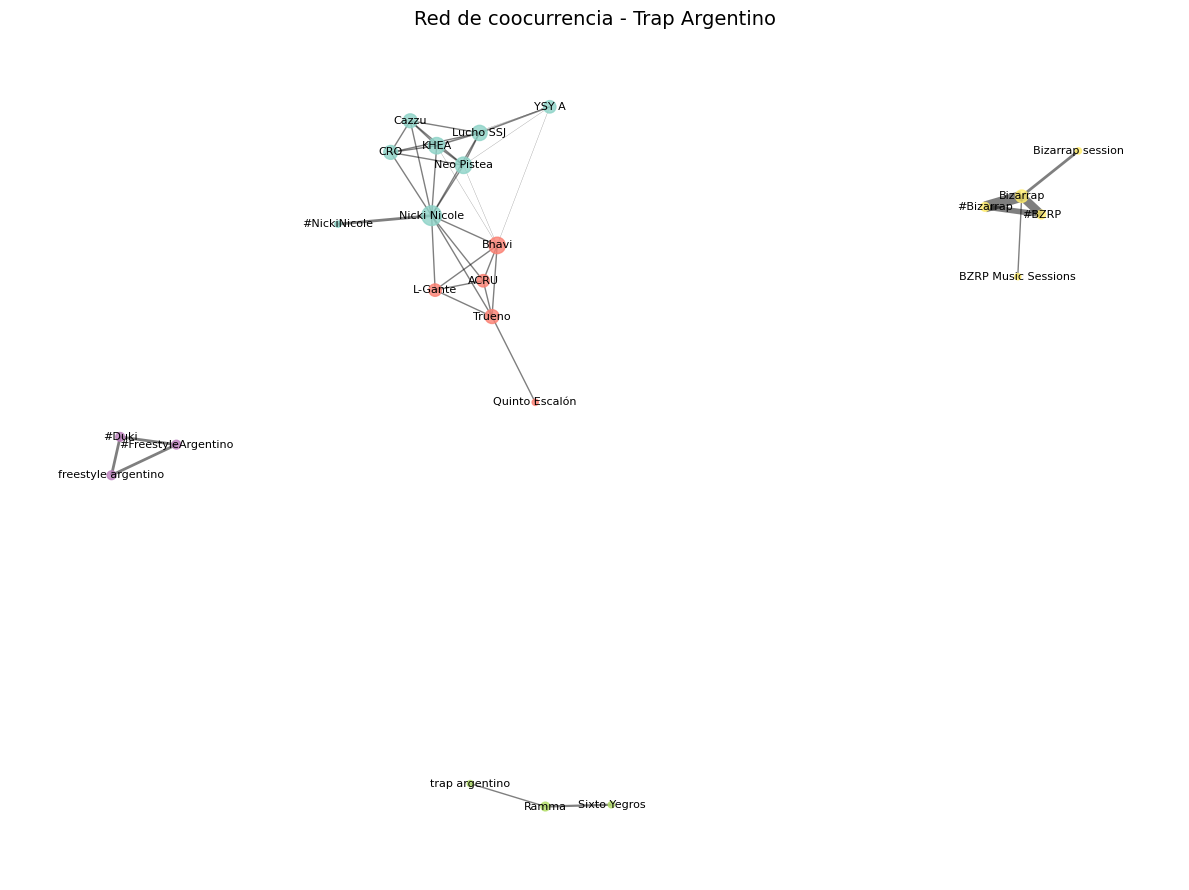

In [62]:
# Layout
pos = nx.spring_layout(G, k=0.5)

# Colores por comunidad
comunidades = [partition.get(nodo) for nodo in G.nodes()]
tamanios = [grado[n] * 20 for n in G.nodes()]

plt.figure(figsize=(12, 9))
nx.draw_networkx_nodes(G, pos, node_size=tamanios, cmap=plt.cm.Set3, node_color=comunidades, alpha=0.8)
nx.draw_networkx_edges(G, pos, width=[G[u][v]['weight']*0.2 for u,v in G.edges()], alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title("Red de coocurrencia - Trap Argentino", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


In [63]:
# Crear DataFrame resumen
resumen = pd.DataFrame({
    'Palabra Clave': list(G.nodes()),
    'Grado': [grado[n] for n in G.nodes()],
    'Centralidad Intermediación': [intermediacion[n] for n in G.nodes()],
    'Centralidad Cercanía': [cercania[n] for n in G.nodes()],
    'Comunidad': [partition[n] for n in G.nodes()]
})

# Añadir eigenvector si está disponible
if 'eigenvector' in G.nodes[list(G.nodes())[0]]:
    resumen['Eigenvector'] = [G.nodes[n].get('eigenvector', 0) for n in G.nodes()]

resumen = resumen.sort_values(by='Grado', ascending=False)
resumen.to_csv("resumen_trap.csv", index=False)


In [6]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys  # Importar Keys
import undetected_chromedriver as uc
import re

options = uc.ChromeOptions()
options.add_argument(r"--user-data-dir=C:\Users\adria\AppData\Local\Google\Chrome\User Data")
options.add_argument(r"--profile-directory=Default")

# Iniciar navegador
driver = uc.Chrome(options=options, version_main=135)



keywords_list =  [
    "Paulo Londra Big Ligas",
    "Paulo Londra demanda",
    "Paulo Londra Warner",
    "Paulo Londra regreso",
    "Paulo Londra juicio",
    "Paulo Londra polémica",
    "Paulo Londra trap",

    "YSYSMO",
    "YSYSMO es un movimiento",
    "YSYSMO no es moda",
    "YSYSMO vs Modo Diablo",
    
    "Modo Diablo separación",
    "Homer El Mero Mero YSY A pelea",
    "Ysy A CRO bardo",
    "Bizarrap y Duki distancia",
    
    "Cazzu Nicki Nicole comparación",
    "Nicki Nicole peso",
    "Nicki Nicole",
    "Nicki Nicole infiel",
    
    "bardo trap argentino",
    "fandoms enfrentados trap argentino",
    "trap argentino toxicidad",
    "hate a artistas trap argetino",
    "twitter trap argentino bardos",
    "trap argentino beef",
    "beef Duki",
    "beef Paulo Londra",
    "beef Bizarrap",
    
    "cancelado trap argentino",
    "cancelación en el trap argentino",
    "cancelar artistas argentinos",
    "trap argentino polémicas 2024",
    
    "tiradera trap argentino",
    "tiradera freestyle argentino",

    
]


# Lista para almacenar los tweets
tweets_data = []

# Número de desplazamientos para cargar más tweets
scrolls = 15

# Bucle para hacer una búsqueda para cada palabra clave
for keyword in keywords_list:
    # URL de búsqueda en Twitter (X)
    driver.get(f"https://twitter.com/search?q={keyword}&src=typed_query&f=live")
    time.sleep(5)  # Espera a que cargue la página

    for _ in range(scrolls):
        # Extraer tweets
        tweet_elements = driver.find_elements(By.XPATH, '//article[@data-testid="tweet"]')

        for tweet in tweet_elements:
            try:
                # Usuario
                user = tweet.find_element(By.XPATH, './/span[contains(text(), "@")]').text
                # Contenido del tweet
                content = tweet.find_element(By.XPATH, './/div[@lang]').text
                # Fecha y hora
                date_time = tweet.find_element(By.XPATH, './/time').get_attribute('datetime')
                # Enlaces en el tweet
                links = [link.get_attribute('href') for link in tweet.find_elements(By.XPATH, './/a')]
                # Respuestas y menciones
                mentions = re.findall(r'@\w+', content)
                # Retweets y likes (visibles en la parte inferior del tweet)
                retweets = tweet.find_element(By.XPATH, './/div[@data-testid="retweet"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="retweet"]') else '0'
                likes = tweet.find_element(By.XPATH, './/div[@data-testid="like"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="like"]') else '0'
                
                # Guardar los datos extraídos
                tweets_data.append({
                    "Palabra Clave": keyword,  # Añadimos la palabra clave
                    "Usuario": user,
                    "Contenido": content,
                    "Fecha y Hora": date_time,
                    "Enlaces": links,
                    "Respuestas/Menciones": mentions,
                    "Retweets": retweets,
                    "Likes": likes
                })
            except Exception as e:
                print(f"Error al procesar un tweet: {e}")
                continue

        # Hacer scroll
        driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
        time.sleep(5)

# Guardar los datos en un DataFrame
df = pd.DataFrame(tweets_data)

# Guardar en CSV para análisis posterior
df.to_csv("tweets_trap_argentino2.csv", index=False)

# Imprimir el número de tweets recolectados
print(f"Se han recolectado {len(df)} tweets.")

# Cerrar el navegador
driver.quit()

Se han recolectado 1539 tweets.


In [7]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import undetected_chromedriver as uc
import re
from urllib.parse import quote

# Configuración de opciones para Chrome
options = uc.ChromeOptions()
options.add_argument(r"--user-data-dir=C:\Users\adria\AppData\Local\Google\Chrome\User Data")
options.add_argument(r"--profile-directory=Default")

# Iniciar navegador
driver = uc.Chrome(options=options, version_main=135)

keywords_list = [
    
    "#YSYSMO",
    "#PauloLondra",
    "#YSYAMovimiento",
    "#BeefTrapArgentino",
    "#ModoDiabloSeAcabó",
    "#FandomsTrapArgentino",
    "#HatersTrapArgentino",
    "#CanceladosTrapArgentino",
]



tweets_data = []
scrolls = 20

for keyword in keywords_list:
    print(f"🔍 Buscando tweets para: {keyword}")
    search_url = f"https://twitter.com/search?q={quote(keyword)}&src=typed_query&f=live"
    driver.get(search_url)
    time.sleep(10)

    for _ in range(scrolls):
        tweet_elements = driver.find_elements(By.XPATH, '//article[@data-testid="tweet"]')

        for tweet in tweet_elements:
            try:
                # Extraer contenido del tweet con idioma
                content_div = tweet.find_element(By.XPATH, './/div[@lang]')
                lang = content_div.get_attribute('lang')
                
                # Solo conservar tweets en español o inglés
                if lang not in ['es', 'en']:
                    continue

                user = tweet.find_element(By.XPATH, './/span[contains(text(), "@")]').text
                content = content_div.text
                date_time = tweet.find_element(By.XPATH, './/time').get_attribute('datetime')
                links = [link.get_attribute('href') for link in tweet.find_elements(By.XPATH, './/a')]
                mentions = re.findall(r'@\w+', content)
                retweets = tweet.find_element(By.XPATH, './/div[@data-testid="retweet"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="retweet"]') else '0'
                likes = tweet.find_element(By.XPATH, './/div[@data-testid="like"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="like"]') else '0'

                if keyword.lower() in content.lower():
                    tweets_data.append({
                        "Palabra Clave": keyword,
                        "Usuario": user,
                        "Contenido": content,
                        "Idioma": lang,
                        "Fecha y Hora": date_time,
                        "Enlaces": links,
                        "Respuestas/Menciones": mentions,
                        "Retweets": retweets,
                        "Likes": likes
                    })

            except Exception as e:
                print(f"⚠️ Error al procesar un tweet: {e}")
                continue

        driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
        time.sleep(5)

# Guardar los datos en un DataFrame
df = pd.DataFrame(tweets_data)
df.to_csv("tweets_hashtags_trap_argentino2.csv", index=False)

print(f"\n✅ Se han recolectado {len(df)} tweets en español o inglés.")
driver.quit()

🔍 Buscando tweets para: #YSYSMO
🔍 Buscando tweets para: #PauloLondra
🔍 Buscando tweets para: #YSYAMovimiento
🔍 Buscando tweets para: #BeefTrapArgentino
🔍 Buscando tweets para: #ModoDiabloSeAcabó
🔍 Buscando tweets para: #FandomsTrapArgentino
🔍 Buscando tweets para: #HatersTrapArgentino
🔍 Buscando tweets para: #CanceladosTrapArgentino

✅ Se han recolectado 200 tweets en español o inglés.


In [8]:
new = pd.read_csv('tweets_trap_argentino2.csv')
new2 = pd.read_csv('tweets_hashtags_trap_argentino2.csv')
old = pd.read_csv('tweets_argentinos_combis.csv')
pd.concat([new,new2, old], ignore_index=True).to_csv('tweets_argentinos_combis2.csv')

In [25]:
df = pd.read_csv('tweets_argentinos_combis2.csv')


df.shape

(2843, 11)

In [26]:
df.drop_duplicates(inplace=True)

In [29]:
df.drop(['Unnamed: 0', 'Idioma', 'Retweets', 'Likes', 'Unnamed: 0.1'], axis=1, inplace=True)

In [30]:
df

,Palabra Clave,Usuario,Contenido,Fecha y Hora,Enlaces,Respuestas/Menciones
0,Paulo Londra Big Ligas,@vinoconsativa,A Paulo londra lo apagó big ligas,2025-04-13T01:49:03.000Z,['https://x.com/i/communities/1891373388368932...,[]
1,Paulo Londra Big Ligas,@kraken_701,Que paso con paulo londra y stream con paulo l...,2025-04-12T20:27:26.000Z,"['https://x.com/kraken_701', 'https://x.com/kr...",[]
2,Paulo Londra Big Ligas,@monopatin11,Extraño a paulo londra cuando hacia musica bue...,2025-04-06T19:50:00.000Z,"['https://x.com/monopatin11', 'https://x.com/m...",[]
3,Paulo Londra Big Ligas,@NaskingPY,Paulo londra sonaba mejor con Big ligas ? \nYa...,2025-03-30T19:49:12.000Z,"['https://x.com/NaskingPY', 'https://x.com/Nas...",[]
4,Paulo Londra Big Ligas,@vinoconsativa,A Paulo londra lo apagó big ligas,2025-04-13T01:49:03.000Z,['https://x.com/i/communities/1891373388368932...,[]
...,...,...,...,...,...,...
2838,#NickiNicole,@rollingstoneEE,"#Miranda con #NickiNicole, #Béele con #MarcAnt...",2025-04-21T23:01:33.000Z,"['https://x.com/rollingstoneEE', 'https://x.co...",[]
2839,#NickiNicole,@isabelracal,#HaceRato #Miranda! ft. #NickiNicole https://y...,2025-04-22T03:53:37.000Z,"['https://x.com/isabelracal', 'https://x.com/i...",['@YouTube']
2840,#NickiNicole,@dante_moliterni,"Haciendo estilo realista por primera vez, dibu...",2025-04-22T01:34:53.000Z,"['https://x.com/dante_moliterni', 'https://x.c...",['@Nicki_Nicole19']
2841,#NickiNicole,@rollingstoneEE,"#Miranda con #NickiNicole, #Béele con #MarcAnt...",2025-04-22T01:31:14.000Z,"['https://x.com/rollingstoneEE', 'https://x.co...",[]


In [31]:
df.to_csv('tweets_argentinos_combis2.csv', index= False)